##EDA



#### Data
The first step of understanding the problem in data science world is to understand our data. We'll look at each variable and do a philosophical analysis about their meaning and importance for this problem.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# if you followed the instructions above exactly, CVA.csv should be
# in DSCI 303/; if your files are in a different directory
# on your Google Drive, you will need to change the path below accordingly
DATADIR = '/content/drive/My Drive/DSCI 303/Final Project/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load comma.csv and display the data head
df = pd.read_csv(DATADIR + "comma.csv")
df.head()

,RespondentID,"In your opinion, which sentence is more gramatically correct?","Prior to reading about it above, had you heard of the serial (or Oxford) comma?","How much, if at all, do you care about the use (or lack thereof) of the serial (or Oxford) comma in grammar?",How would you write the following sentence?,"When faced with using the word ""data"", have you ever spent time considering if the word was a singular or plural noun?","How much, if at all, do you care about the debate over the use of the word ""data"" as a singluar or plural noun?","In your opinion, how important or unimportant is proper use of grammar?",Gender,Age,Household Income,Education,Location (Census Region)
0,3292953864,"It's important for a person to be honest, kind...",Yes,Some,"Some experts say it's important to drink milk,...",No,Not much,Somewhat important,Male,30-44,"$50,000 - $99,999",Bachelor degree,South Atlantic
1,3292950324,"It's important for a person to be honest, kind...",No,Not much,"Some experts say it's important to drink milk,...",No,Not much,Somewhat unimportant,Male,30-44,"$50,000 - $99,999",Graduate degree,Mountain
2,3292942669,"It's important for a person to be honest, kind...",Yes,Some,"Some experts say it's important to drink milk,...",Yes,Not at all,Very important,Male,30-44,NaN,NaN,East North Central
3,3292932796,"It's important for a person to be honest, kind...",Yes,Some,"Some experts say it's important to drink milk,...",No,Some,Somewhat important,Male,18-29,NaN,Less than high school degree,Middle Atlantic
4,3292932522,"It's important for a person to be honest, kind...",No,Not much,"Some experts say it's important to drink milk,...",No,Not much,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# rename columns
df.columns = ['respondent_id', 'use_oxford_comma', 'heard_of_comma', 
'care_for_comma', 'use_data_plural', 'considered_data_plural', 
'care_data_plural', 'care_grammar', 'gender', 'age', 'household_income', 
'education', 'location']

# change feature values to be more convenient
df.loc[df['use_oxford_comma'] == 
"It's important for a person to be honest, kind, and loyal.", 
'use_oxford_comma'] = 'Yes'

df.loc[df['use_oxford_comma'] == 
"It's important for a person to be honest, kind and loyal.", 
'use_oxford_comma'] = 'No'

df.loc[df['use_data_plural'] == 
"Some experts say it's important to drink milk, but the data is inconclusive.", 
'use_data_plural'] = 'No'

df.loc[df['use_data_plural'] == 
"Some experts say it's important to drink milk, but the data are inconclusive.",
'use_data_plural'] = 'Yes'

df.loc[df['care_grammar'] == 
"Neither important nor unimportant (neutral)", 'care_grammar'] = 'Neutral'

df['use_data_plural'].value_counts() # No: 865, Yes: 228
display(df)

,respondent_id,use_oxford_comma,heard_of_comma,care_for_comma,use_data_plural,considered_data_plural,care_data_plural,care_grammar,gender,age,household_income,education,location
0,3292953864,No,Yes,Some,No,No,Not much,Somewhat important,Male,30-44,"$50,000 - $99,999",Bachelor degree,South Atlantic
1,3292950324,Yes,No,Not much,No,No,Not much,Somewhat unimportant,Male,30-44,"$50,000 - $99,999",Graduate degree,Mountain
2,3292942669,Yes,Yes,Some,No,Yes,Not at all,Very important,Male,30-44,NaN,NaN,East North Central
3,3292932796,Yes,Yes,Some,No,No,Some,Somewhat important,Male,18-29,NaN,Less than high school degree,Middle Atlantic
4,3292932522,No,No,Not much,No,No,Not much,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,3288387618,Yes,Yes,A lot,No,No,A lot,Very important,Female,18-29,"$100,000 - $149,999",Some college or Associate degree,South Atlantic
1125,3288387379,No,No,Some,No,No,Some,Very important,Female,30-44,"$50,000 - $99,999",Some college or Associate degree,Pacific
1126,3288382543,Yes,Yes,Some,No,No,Not much,Somewhat important,Female,30-44,"$50,000 - $99,999",Graduate degree,Middle Atlantic
1127,3288379152,No,Yes,A lot,No,Yes,Not much,Very important,Female,45-60,"$50,000 - $99,999",Graduate degree,East South Central


In [ ]:
# Print the high-level information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   respondent_id           1129 non-null   int64 
 1   use_oxford_comma        1129 non-null   object
 2   heard_of_comma          1099 non-null   object
 3   care_for_comma          1099 non-null   object
 4   use_data_plural         1093 non-null   object
 5   considered_data_plural  1091 non-null   object
 6   care_data_plural        1091 non-null   object
 7   care_grammar            1059 non-null   object
 8   gender                  1037 non-null   object
 9   age                     1037 non-null   object
 10  household_income        836 non-null    object
 11  education               1026 non-null   object
 12  location                1027 non-null   object
dtypes: int64(1), object(12)
memory usage: 114.8+ KB


We can see in this data, not every features column has complete entries, which means: we have MISSING DATA!

Let's just remove Id and the features with 30% or less NaN values.

In [ ]:
# Remove columns with too many missing values

# Not going to remove any other than respondent_id since the feature 
# ("household_income") that has the most number of missing values has less 
# than 30% NaN values

df2 = df[[column for column in df if df[column].count() / len(df) >= 0.7]]

print("List of dropped columns:", end=" ")
for c in df.columns:
    if c not in df2.columns:
        print(c, end=", ")

if df.shape == df2.shape:
   print('N/A')
print('\n')
df = df2
df = df.drop(columns='respondent_id')

print('The column "household_income" has the highest percentage of NaN values:', 
1 - df['household_income'].count()/len(df), ', which is still less than 30%.')

List of dropped columns: N/A


The column "household_income" has the highest percentage of NaN values: 0.25952170062001767 , which is still less than 30%.


In [ ]:
# Education is our output variable, we will drop any rows missing the value. 
# This is also a good decision because we are
# unable to impute its missing values in a way that does not negatively impact 
# training the model.

df = df.dropna(subset = ['education'])

#### Distribution Analysis of Features/ Label

Now, let's look into the distribution of the output variable (Education).

count                1026
unique                  5
top       Bachelor degree
freq                  344
Name: education, dtype: object


/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


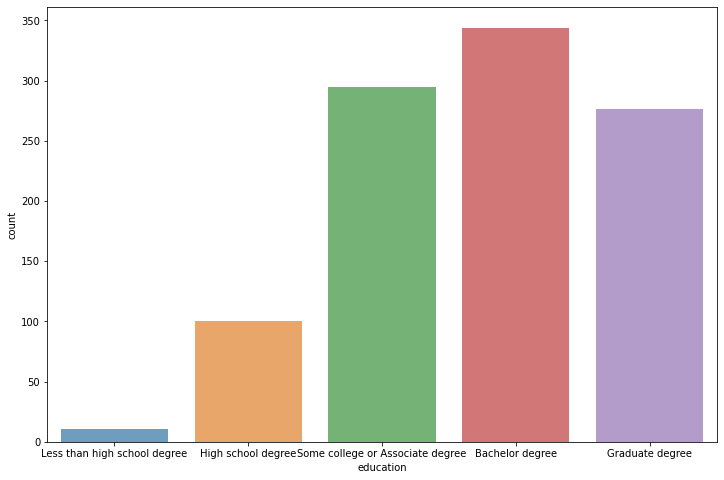

In [ ]:
print(df['education'].describe())
plt.figure(figsize=(12, 8))

df['education'] = df['education'].astype('category')
df.education.cat.set_categories(
    new_categories = ['Less than high school degree', 'High school degree', 
    'Some college or Associate degree', 'Bachelor degree', 'Graduate degree'], 
    ordered = True, inplace = True)

sns.countplot(x='education', alpha=0.7, data=df)

We can plot the distribution for featrues as well. All features are categorical features. There is no numerical feature in this Comma_Survey dataset.

In [ ]:
# Select the numerical featrues
df_num = df.select_dtypes(include = 'number')
df_num.head()
# NO NUMERIC FEATURES

df_not_num = df.select_dtypes(include = ['O'])
print('There is {} non numerical features including:\n{}'.format(len(
df_not_num.columns), df_not_num.columns.tolist()))

There is 11 non numerical features including:
['use_oxford_comma', 'heard_of_comma', 'care_for_comma', 'use_data_plural', 'considered_data_plural', 'care_data_plural', 'care_grammar', 'gender', 'age', 'household_income', 'location']


In [ ]:
df['household_income'] = df['household_income'].astype('category')
df.household_income.cat.set_categories(new_categories = ["$0 - $24,999",
"$25,000 - $49,999","$50,000 - $99,999","$100,000 - $149,999","$150,000+"], 
ordered = True, inplace = True)

# convert ordinal features to be ordered

df['use_oxford_comma'] = df['use_oxford_comma'].astype('category')
df.use_oxford_comma.cat.set_categories(
new_categories = ['Yes', 'No'], ordered = True, inplace = True)

df['heard_of_comma'] = df['heard_of_comma'].astype('category')
df.heard_of_comma.cat.set_categories(
new_categories = ['Yes', 'No'], ordered = True, inplace = True)

df['use_data_plural'] = df['use_data_plural'].astype('category')
df.use_data_plural.cat.set_categories(
new_categories = ['Yes', 'No'], ordered = True, inplace = True)

df['considered_data_plural'] = df['considered_data_plural'].astype('category')
df.considered_data_plural.cat.set_categories(
new_categories = ['Yes', 'No'], ordered = True, inplace = True)

df['care_for_comma'] = df['care_for_comma'].astype('category')
df.care_for_comma.cat.set_categories(
new_categories = ['Not at all', 'Not much', 'Some', 'A lot'], 
ordered = True, inplace = True)

df['care_data_plural'] = df['care_data_plural'].astype('category')
df.care_data_plural.cat.set_categories(
new_categories = ['Not at all', 'Not much', 'Some', 'A lot'], ordered = True, 
inplace = True)

df['care_grammar'] = df['care_grammar'].astype('category')
df.care_grammar.cat.set_categories(
new_categories = ['Very unimportant', 'Somewhat unimportant', 'Neutral', 
'Somewhat important', 'Very important'], ordered = True, inplace = True)

df['age'] = df['age'].astype('category')
df.age.cat.set_categories(
new_categories = ['18-29', '30-44', '45-60', '> 60'], ordered = True, 
inplace = True)

df['education'] = df['education'].astype('category')
df.education.cat.set_categories(
new_categories = ['Less than high school degree', 'High school degree', 
'Some college or Associate degree','Bachelor degree', 'Graduate degree'], 
ordered = True, inplace = True)

Looking at these features we can see that a lot of them are of the type Object(O). In our data transformation notebook we could use Pandas categorical functions (equivalent to R's factor) to shape our data in a way that would be interpretable for our machine learning algorithm.

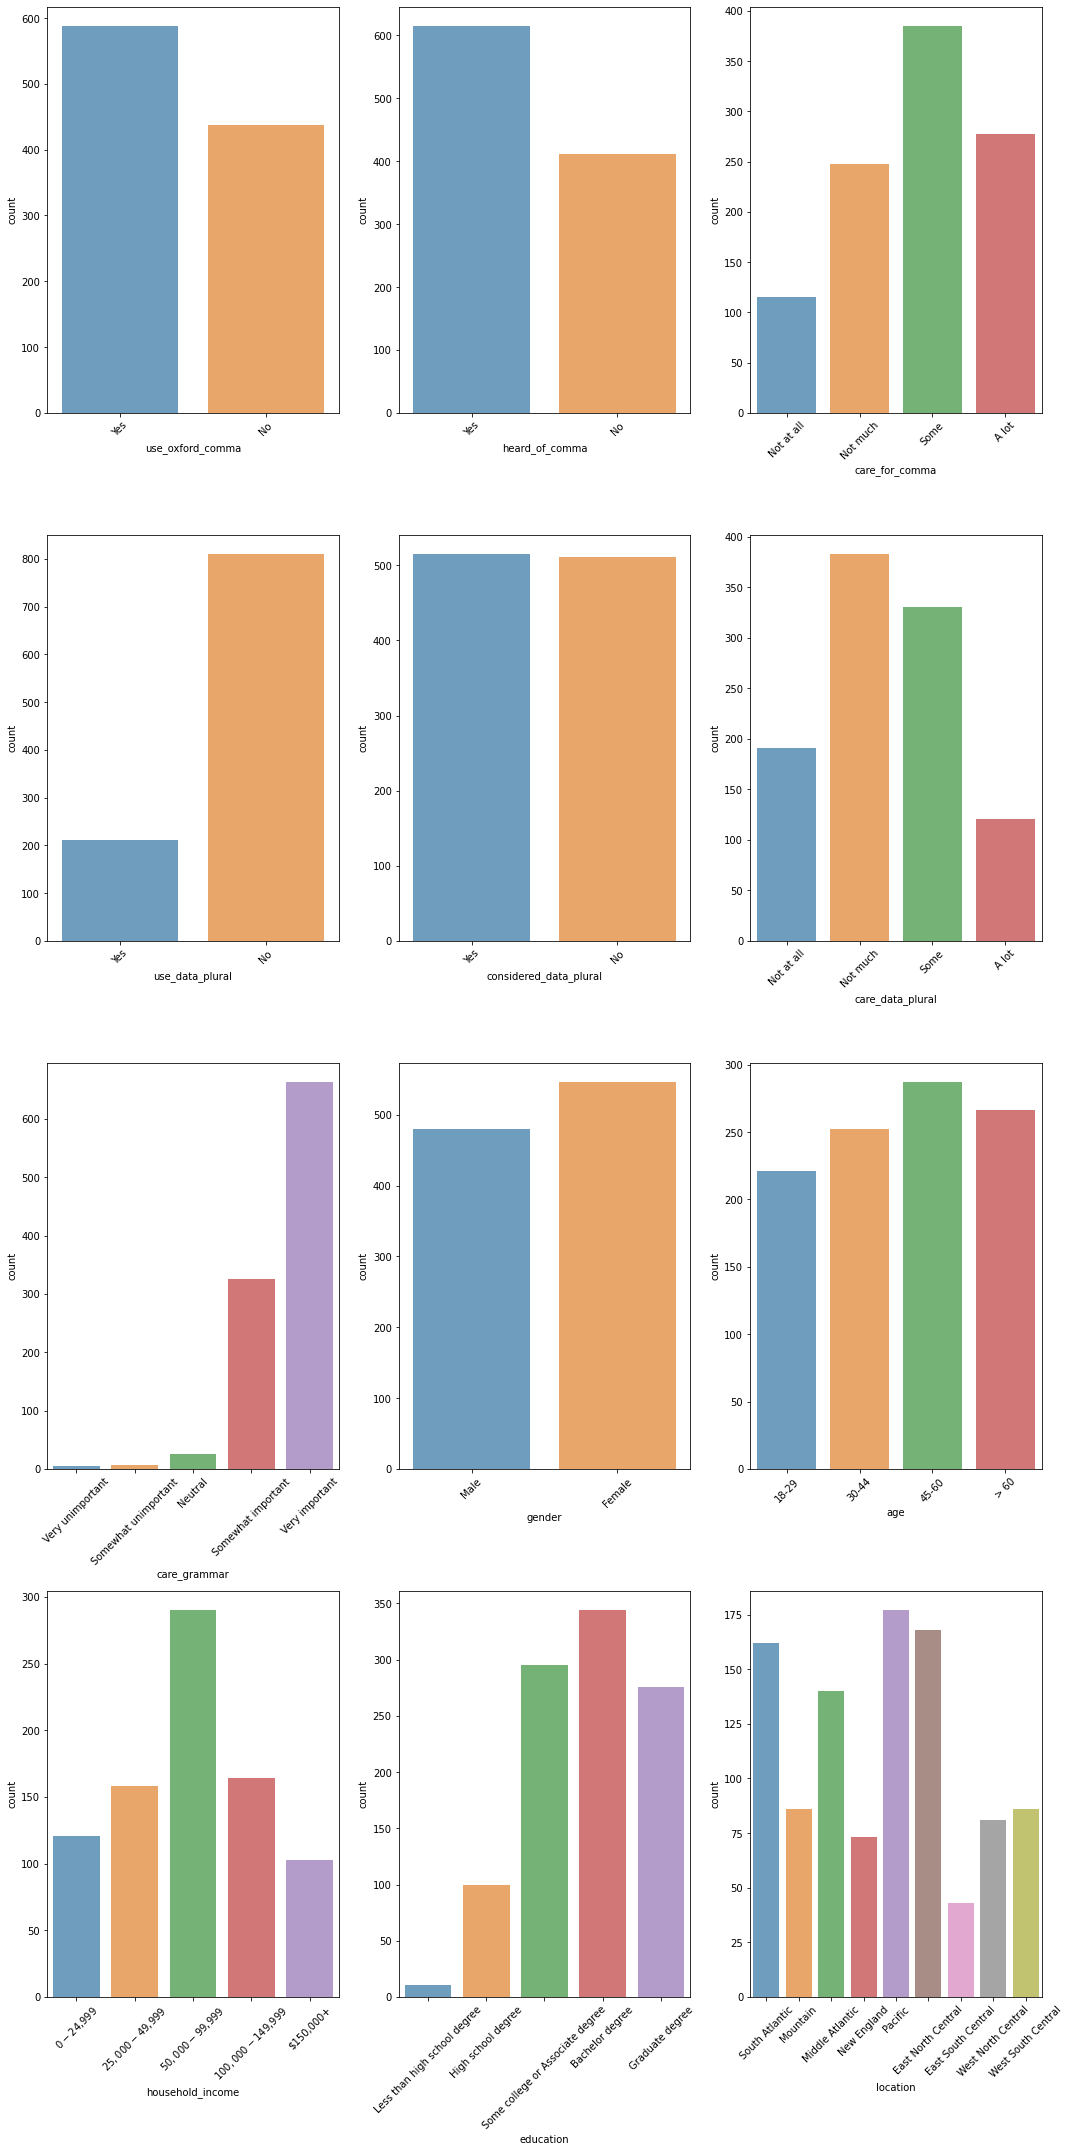

In [ ]:
df_not_num = df

fig, axes = plt.subplots(round(len(df_not_num.columns) / 3), 3, figsize=(15, 30))

for i, ax in enumerate(fig.axes):
    if i < len(df_not_num.columns):
        ax.tick_params(axis='x', rotation=45)
        sns.countplot(x=df_not_num.columns[i], alpha=0.7, data=df_not_num, ax=ax)

fig.tight_layout()

We can see that none of the categories are too predominant for some features. These features may all be relevant for our predictive model

#### Correlation (association) Analysis

Now we'll try to find which features are strongly associated with household_income. We'll store them in a list called golden_features_list.

In [ ]:
from scipy.stats import chi2_contingency
# no numeric variables, so we will use the Chi-square test to find the correlation between categorical variables
chisqresults = []
for i in range(0,7):
  if df.columns[i] == 'education':
    continue
  CrosstabResult=pd.crosstab(index=df['education'],columns=df[df.columns[i]])
  ChiSqResult = chi2_contingency(CrosstabResult)
  chisqresults.append((i, df.columns[i], ChiSqResult[1]))

chisqresults.sort(key = lambda x: x[2])
#print(chisqresults)
golden_features_list = []
for i in range(len(chisqresults)):
  # we will use a significance level of .1 to determine if a feature is strongly correlated
  if chisqresults[i][2] < .1:
    golden_features_list.append((chisqresults[i][1], chisqresults[i][2]))

print("There is {} strongly correlated values with education:\n{}".format(len(golden_features_list), golden_features_list))

There is 6 strongly correlated values with education:
[('considered_data_plural', 3.349363360264456e-07), ('use_data_plural', 2.301706193793381e-06), ('care_grammar', 2.2708532920571862e-05), ('heard_of_comma', 3.3147029057493167e-05), ('care_for_comma', 0.008056369776353236), ('care_data_plural', 0.010941721063865376)]


As we can see, based on the chi-squared test, 6 out of the 7 total grammer-related features have p-values less than .1, meaning we can reject the null hypothesis that they are not associated with household_income with a significance level of .1. This is promising, as it shows there is a potential tie between people being passionate about proper grammar with education level.

We can visualize the associations among columns using heatmap!

NOTE: Because we have only cateogorical variables, instead of visualizing correlations, we will visualize the Cramér's V score, which is a measure of association between two nominal variables. https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V

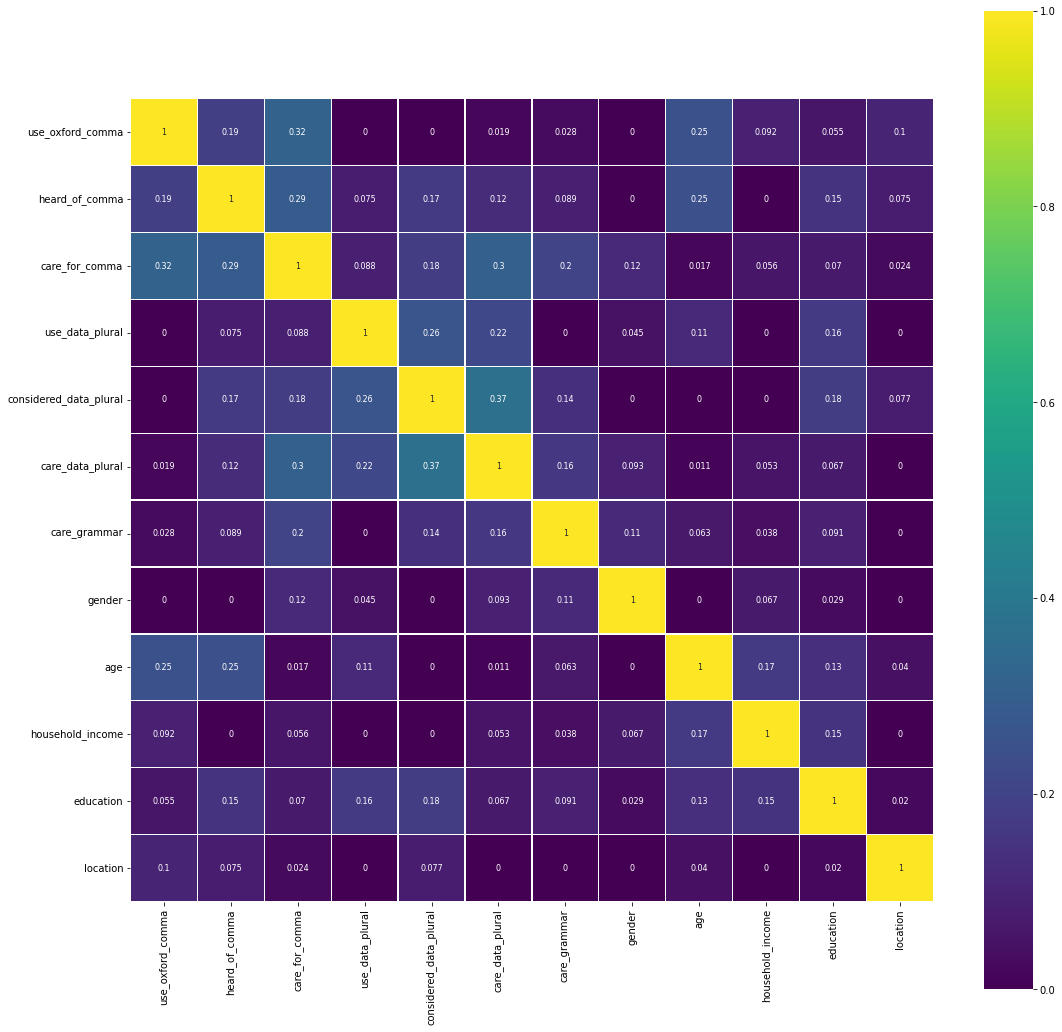

In [ ]:
# source: https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
def cramers_v(x, y):
  confusion_matrix = pd.crosstab(x,y)
  chi2 = chi2_contingency(confusion_matrix)[0]
  n = confusion_matrix.sum().sum()
  phi2 = chi2/n
  r,k = confusion_matrix.shape
  phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
  rcorr = r-((r-1)**2)/(n-1)
  kcorr = k-((k-1)**2)/(n-1)
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

cramers_mtx = []
for i in range(0,len(df.columns)):
  cramers_mtx.append([0 for _ in range(len(df.columns))])

for i in range(0,len(df.columns)):
  for j in range(i,len(df.columns)):
    cramers_mtx[i][j] = cramers_v(df[df.columns[i]], df[df.columns[j]])
    cramers_mtx[j][i] = cramers_mtx[i][j]
    #print(cramers_v(df[df.columns[i]], df[df.columns[j]]))

cramers_mtx = pd.DataFrame(cramers_mtx, index=df.columns, columns=df.columns)

plt.figure(figsize=(18, 18))
# df_cramers = cramers_v(df, df)
sns.heatmap(cramers_mtx, 
            cmap='viridis', vmax=1.0, vmin=0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

Interesting to note that the greatest associations are in the .3-.4 range, and they are usually between someone having heard of a grammar concept and their care for the use of that concept in language. Also interesting to note that based on this metric, none of the grammar-related metrics have a very strong association with household income. But, with this metric, neither do age or education, so it seems like this metric requires very strong associations.

After prelimary data analysis, you should know our dataset better now.

Next step, we will start building our classification model with tricks that leverage the findings in EDA!

## Data Pre-Processing

#### Missing data

In the above analysis, we already noticed that we have some missing values in the dataset. Unfortunately, these missing values cannot be handled by the machine learning without pre-processing. We will first impute the missing values.

In [ ]:
y = df[['education']]
# We won't use any label information during data pre-processing and feature 
# engineering
df.drop(['education'], axis=1, inplace=True)

In [ ]:
y_na = (y.isnull().sum() / len(df)) * 100
missing_y = pd.DataFrame({'Missing Ratio' :y_na})
missing_y
# Earlier on, we removed any columns missing education
# We do not want to impute missing income values because it may skew our results.

# For future improvements of the model, imputing its missing values might 
# be possible with a robust method of such as kNN for categorical variables.

,Missing Ratio
education,0.0


In [ ]:
df_na = (df.isnull().sum() / len(df)) * 100
# The column "use_oxford_comma" is dropped from missing_data because it has 0 
# missing data.
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :df_na})
missing_data.head(20)

,Missing Ratio
household_income,18.518519
location,0.974659
use_data_plural,0.389864


Text(0.5, 1.0, 'Percent missing data by feature')

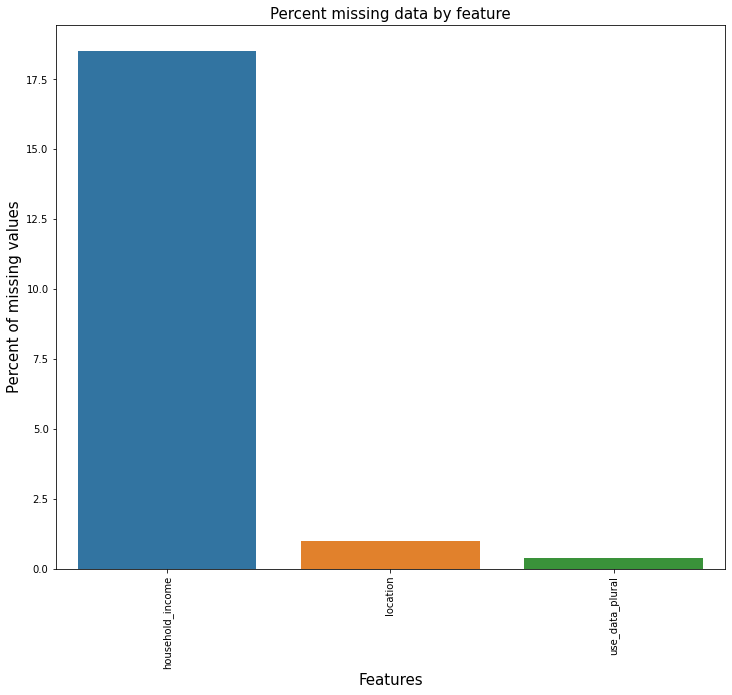

In [ ]:
# Visualize the missing ratios
f, ax = plt.subplots(figsize=(12, 10))
plt.xticks(rotation='90')
sns.barplot(x=df_na.index, y=df_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

- **Missing value imputation** : For now, all the missing values are replaced by the most frequent value in that column (the mode)

In [ ]:
import numpy as np

for i in range(df.shape[1]):
    df[df.columns[i]] = np.where(df[df.columns[i]].isna(), 
    df[df.columns[i]].mode(), df[df.columns[i]])
print(df[25:35])

# For future improvement, maybe use SimpleImputer(strategy='most_frequent') 
# instead of manual imputation

   use_oxford_comma heard_of_comma care_for_comma use_data_plural  \
29              Yes            Yes           Some              No   
30              Yes            Yes           Some              No   
31               No             No       Not much              No   
32               No             No       Not much              No   
33               No            Yes          A lot              No   
34              Yes            Yes           Some              No   
35              Yes            Yes           Some             Yes   
36               No            Yes       Not much              No   
37              Yes             No           Some              No   
38              Yes             No          A lot              No   

   considered_data_plural care_data_plural          care_grammar gender  \
29                     No             Some        Very important   Male   
30                     No         Not much    Somewhat important   Male   
31             

Is there any remaining missing value? 

In [ ]:
#Check remaining missing values if any 
df_na = (df.isnull().sum() / len(df)) * 100
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :df_na})
missing_data.head()

,Missing Ratio


It remains no missing value.

## Features Engineering

**Transforming some numerical variables that are really categorical**

We do not need to transform here because all the variables are already categorical.

**Ordinal Encoding some categorical variables that may contain information in their ordering set** 

In [ ]:
# Label Encoding should be applied to non-ordinal (aka nominal) variables and 
# not ordinal variables in our case. So, pandas factorize method is used instead.

# Here are the columns which use the same binary labels (and N/A). 
cols = ('use_oxford_comma','heard_of_comma','use_data_plural',
       'considered_data_plural')

# Using pandas factorize method for ordinal data
for i in cols:
  categories = pd.Categorical(df[i], categories=['No','Yes'], ordered=True)
  
  # Factorizing the column data
  labels, unique = pd.factorize(categories, sort=True)
  df[i] = labels
  

# Here are the columns which use the same non-binary labels (not at all, not
# much, some, a lot, and N/A). 
cols_1 = ('care_for_comma','care_data_plural')

# Using pandas factorize method for ordinal data
for i in cols_1:
  categories = pd.Categorical(df[i], categories=['Not at all','Not much', 
                                    'Some','A lot'], ordered=True)
  
  # Factorizing the column data
  labels, unique = pd.factorize(categories, sort=True)
  df[i] = labels
  
# Here are the other columns which require manual transformation for the
# categorical variables.
# care_grammar  
categories = pd.Categorical(df['care_grammar'], categories=[
    'Very unimportant', 'Somewhat unimportant', 'Neutral', 
    'Somewhat important', 'Very important'], ordered=True)
# Factorizing the column data
labels, unique = pd.factorize(categories, sort=True)
df['care_grammar'] = labels

# # gender
categories = pd.Categorical(df['gender'], categories=['Female','Male'], 
            ordered=True)
# Factorizing the column data
labels, unique = pd.factorize(categories, sort=True)
df['gender'] = labels

# # age
categories = pd.Categorical(df['age'], categories=['18-29', '30-44', 
                              '45-60', '> 60'], ordered=True)
# Factorizing the column data
labels, unique = pd.factorize(categories, sort=True)
df['age'] = labels

# # household_income
categories = pd.Categorical(df['household_income'], categories=['$0 - $24,999', 
  '$25,000 - $49,999','$50,000 - $99,999', '$100,000 - $149,999', '$150,000+'], 
  ordered=True)
# Factorizing the column data
labels, unique = pd.factorize(categories, sort=True)
df['household_income'] = labels

# # education
# categories = pd.Categorical(df['education'], categories=[
#     'Less than high school degree', 'High school degree', 
#     'Some college or Associate degree', 'Bachelor degree', 
#     'Graduate degree'], ordered=True)
# Factorizing the column data
# labels, unique = pd.factorize(categories, sort=True)
# df['education'] = labels

In [ ]:
print(df.head())

   use_oxford_comma  heard_of_comma  care_for_comma  use_data_plural  \
0                 0               1               2                0   
1                 1               0               1                0   
3                 1               1               2                0   
5                 1               0               3                1   
6                 1               1               3                0   

   considered_data_plural  care_data_plural  care_grammar  gender  age  \
0                       0                 1             3       1    1   
1                       0                 1             1       1    1   
3                       0                 2             3       1    0   
5                       1                 2             4       1    0   
6                       1                 2             4       1    0   

   household_income         location  
0                 2   South Atlantic  
1                 2         Mountain  
3    

In [ ]:
y[0:10]

,education
0,Bachelor degree
1,Graduate degree
3,Less than high school degree
5,Some college or Associate degree
6,Some college or Associate degree
7,Some college or Associate degree
8,Graduate degree
9,Bachelor degree
10,Bachelor degree
11,Some college or Associate degree


In [ ]:
# transform the multi-class label (apply factorization to categorical features)
# # education
y.loc[:,'education'] = np.where(y.loc[:,'education'].isna(), y.loc[:,'education'].mode(), y.loc[:,'education'])
# y['education'].mode() = 'Bachelor degree'

categories = pd.Categorical(y.loc[:,'education'], categories=[
    'Less than high school degree', 'High school degree', 
    'Some college or Associate degree', 'Bachelor degree', 
    'Graduate degree'], ordered=True)
# Factorizing the column data
labels, unique = pd.factorize(categories, sort=True)
y = labels

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value


In [ ]:
print(y[0:10])

[3 4 0 2 2 2 4 3 3 2]


**Skewed features**

Different weights can be assigned to samples from different classes in the model's loss function, inversely proportional to their frequencies. This would ensure that even classes with few datapoints will equally affect the model's loss, as compared to classes with large number of datapoints.

In [ ]:
from scipy.stats import skew

# All features except "location"
numeric_feats = df.dtypes[df.dtypes != "object"].index

# Check the skew of all features
skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna()))
print("\nSkew in features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness = skewness.reset_index()
print(skewness.head(10))


Skew in features: 

                    index      Skew
0        use_oxford_comma -0.295574
1          heard_of_comma -0.405762
2          care_for_comma -0.361156
3         use_data_plural  1.449160
4  considered_data_plural -0.007797
5        care_data_plural  0.113868
6            care_grammar -1.902008
7                  gender  0.128922
8                     age -0.111084
9        household_income -0.023543


In [ ]:
skewed = skewness[abs(skewness['Skew']) > 0.75]
print(skewed)
print("There are {} skewed numerical features to Box Cox transform".format(
    skewed.shape[0]))

             index      Skew
3  use_data_plural  1.449160
6     care_grammar -1.902008
There are 2 skewed numerical features to Box Cox transform


**Getting dummy categorical features**

For binary, ordinal, and interval variables, we would not like to one-hot-code all the classes. There is no need for binary variables; and for ordinal and interval variables, doing so would affect the distance between each class [which should be the same].

For other variables (like nominal variables e.g. location) which does not have natural rank ordering, we can just one-hot-code it.

In [ ]:
df = pd.get_dummies(df)
print(df.shape)

(1026, 19)


In [ ]:
print(df.head())

   use_oxford_comma  heard_of_comma  care_for_comma  use_data_plural  \
0                 0               1               2                0   
1                 1               0               1                0   
3                 1               1               2                0   
5                 1               0               3                1   
6                 1               1               3                0   

   considered_data_plural  care_data_plural  care_grammar  gender  age  \
0                       0                 1             3       1    1   
1                       0                 1             1       1    1   
3                       0                 2             3       1    0   
5                       1                 2             4       1    0   
6                       1                 2             4       1    0   

   household_income  location_East North Central  location_East South Central  \
0                 2                      

Spliting the train and test sets. We only include the grammar-related features, not demographic features.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['use_oxford_comma', 
'heard_of_comma', 'care_for_comma', 'use_data_plural', 'considered_data_plural',
'care_data_plural', 'care_grammar']], y, test_size=0.2, random_state=0)

## Algorithm

#### Logistic Regression

Logistic Regression (Baseline) w/o optimization

Test set F1 score is:  0.3592233009708738
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        19
           2       0.37      0.31      0.33        59
           3       0.30      0.55      0.39        64
           4       0.50      0.35      0.41        60

    accuracy                           0.36       206
   macro avg       0.23      0.24      0.23       206
weighted avg       0.35      0.36      0.34       206



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


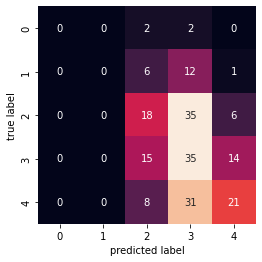

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(df[['use_oxford_comma', 
'heard_of_comma', 'care_for_comma', 'use_data_plural', 'considered_data_plural',
'care_data_plural', 'care_grammar']], y, test_size=0.2,
random_state=0)

model = LogisticRegression(random_state=0, max_iter=500)
model.fit(X_train, y_train)
y_pred_test_ = model.predict(X_test)

# Score to evaluate model performance
# print("Test set accuracy is: ", model_selected_features.score(X_test, y_test))
print("Test set F1 score is: ",  f1_score(y_test, y_pred_test_, average='micro'))

mat = confusion_matrix(y_pred_test_, y_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('predicted label')
plt.ylabel('true label')

precision_recall = classification_report(y_test, y_pred_test_)
print(precision_recall)

Logistic Regression (w/ standardization)

Test set F1 score is:  0.35436893203883496
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        19
           2       0.36      0.31      0.33        59
           3       0.30      0.53      0.38        64
           4       0.50      0.35      0.41        60

    accuracy                           0.35       206
   macro avg       0.23      0.24      0.22       206
weighted avg       0.34      0.35      0.33       206



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


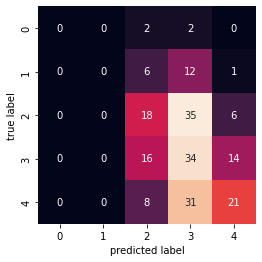

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# have the train data split into train and cross validation data
X_train_2, X_val, y_train_2, y_val = train_test_split(X_train, 
                            y_train, test_size=0.2, random_state=0)

ss = StandardScaler()
X_train_2_scaled = pd.DataFrame(ss.fit_transform(X_train_2), 
columns=X_train_2.columns)
X_val_scaled = pd.DataFrame(ss.transform(X_val), columns=X_val.columns)

# Scale full training set (since we do CV training later)
X_train_scaled = pd.DataFrame(ss.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(ss.transform(X_test), columns=X_test.columns)

model = LogisticRegression(random_state=0, max_iter=500)
model.fit(X_train_scaled, y_train)
y_pred_test_ = model.predict(X_test_scaled)

# Score to evaluate model performance
# print("Test set accuracy is: ", model_selected_features.score(X_test, y_test))
print("Test set F1 score is: ",  f1_score(y_test, y_pred_test_, average='micro'))

mat = confusion_matrix(y_pred_test_, y_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('predicted label')
plt.ylabel('true label')

precision_recall = classification_report(y_test, y_pred_test_)
print(precision_recall)

# The F1 score after standardization decreases by a negligible amount. We 
# keep the step of standardization.

Logistic Regression: the addition of class weights to the model's loss function (to resolve skewness)

Test set F1 score is:  0.2621359223300971
              precision    recall  f1-score   support

           0       0.03      0.25      0.06         4
           1       0.08      0.21      0.12        19
           2       0.37      0.19      0.25        59
           3       0.34      0.16      0.22        64
           4       0.41      0.47      0.43        60

    accuracy                           0.26       206
   macro avg       0.25      0.25      0.21       206
weighted avg       0.34      0.26      0.28       206



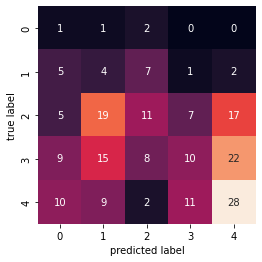

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = LogisticRegression(random_state=0, max_iter=500, 
class_weight = 'balanced')

model.fit(X_train_scaled, y_train)
y_pred_test_ = model.predict(X_test_scaled)

# Score to evaluate model performance
# print("Test set accuracy is: ", model_selected_features.score(X_test, y_test))
print("Test set F1 score is: ",  f1_score(y_test, y_pred_test_, average='micro'))

mat = confusion_matrix(y_pred_test_, y_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('predicted label')
plt.ylabel('true label')

precision_recall = classification_report(y_test, y_pred_test_)
print(precision_recall)

# The F1 score decreases after applying class weights, but it does not tend to
# bias the most frequent class (class 3). So, we keep the addition of class
# weights.

Logistic Regression: after oversampling

In [ ]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# https://imbalanced-learn.org/stable/over_sampling.html#a-practical-guide
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0, sampling_strategy='not majority')
X_resampled, y_resampled = ros.fit_resample(X_train_scaled, y_train)

use_resampled = True

Test set F1 score is:  0.23300970873786409
              precision    recall  f1-score   support

           0       0.03      0.25      0.05         4
           1       0.08      0.21      0.11        19
           2       0.35      0.12      0.18        59
           3       0.28      0.16      0.20        64
           4       0.43      0.43      0.43        60

    accuracy                           0.23       206
   macro avg       0.23      0.23      0.19       206
weighted avg       0.32      0.23      0.25       206



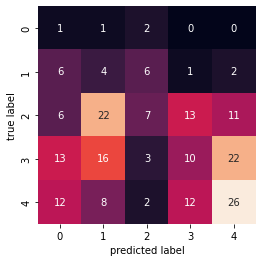

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = LogisticRegression(random_state=0, max_iter=500, 
class_weight = 'balanced')

model.fit(X_resampled, y_resampled)
y_pred_test_ = model.predict(X_test_scaled)

# Score to evaluate model performance
# print("Test set accuracy is: ", model_selected_features.score(X_test, y_test))
print("Test set F1 score is: ",  f1_score(y_test, y_pred_test_, average='micro'))

mat = confusion_matrix(y_pred_test_, y_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('predicted label')
plt.ylabel('true label')

precision_recall = classification_report(y_test, y_pred_test_)
print(precision_recall)

# The F1 score decreases after applying class weights, but it does not tend to
# bias the most frequent class (class 3). So, we keep the addition of class
# weights.

Logistic Regression: after binary classification (1st way, by grouping classes 0-2 as class 0 and classes 3-4 as class 1)

Test set F1 score is:  0.616504854368932
              precision    recall  f1-score   support

         0.0       0.52      0.57      0.54        82
         1.0       0.70      0.65      0.67       124

    accuracy                           0.62       206
   macro avg       0.61      0.61      0.61       206
weighted avg       0.62      0.62      0.62       206



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


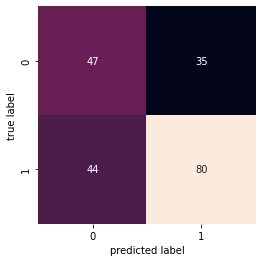

In [ ]:
## Logistic Regression: after binary classification (1st way)
y_df = pd.DataFrame(y, columns = ['education'])
y_df['education_binary'] = np.nan

# 'Less than high school degree','High school degree', 
# "Some college or Associate degree" are in class 0
y_df.loc[y_df['education'] == 0, 'education_binary'] = 0 
y_df.loc[y_df['education'] == 1, 'education_binary'] = 0 
y_df.loc[y_df['education'] == 2, 'education_binary'] = 0

# 'Bachelor degree' and 'Graduate degree' are in class 1
y_df.loc[y_df['education'] == 3, 'education_binary'] = 1 
y_df.loc[y_df['education'] == 4, 'education_binary'] = 1 
y_df = y_df[['education_binary']]

# Standardization
X1_train, X1_test, y1_train, y1_test = train_test_split(df[['use_oxford_comma', 
'heard_of_comma', 'care_for_comma', 'use_data_plural', 'considered_data_plural',
'care_data_plural', 'care_grammar']], y_df, test_size=0.2,
random_state=0)

# have the train data split into train and cross validation data
X1_train_2, X1_val, y1_train_2, y1_val = train_test_split(X1_train, 
                            y1_train, test_size=0.2, random_state=0)

ss = StandardScaler()
X1_train_2_scaled = pd.DataFrame(ss.fit_transform(X1_train_2), 
columns=X1_train_2.columns)
X1_val_scaled = pd.DataFrame(ss.transform(X1_val), columns=X1_val.columns)

# Scale full training set (since we do CV training later)
X1_train_scaled = pd.DataFrame(ss.fit_transform(X1_train), columns=X1_train.columns)
X1_test_scaled = pd.DataFrame(ss.transform(X1_test), columns=X1_test.columns)

# Oversampling
# https://imbalanced-learn.org/stable/over_sampling.html#a-practical-guide
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0, sampling_strategy='not majority')
X1_resampled, y1_resampled = ros.fit_resample(X1_train_scaled, y1_train)
X1_resampled_,y1_resampled_ = ros.fit_resample(X1_train_2_scaled, y1_train_2)
use_resampled = True

model = LogisticRegression(random_state=0, max_iter=500,
class_weight = 'balanced')
model.fit(X1_resampled, y1_resampled)
y_pred_test_ = model.predict(X1_test_scaled)

# Score to evaluate model performance
# print("Test set accuracy is: ", model_selected_features.score(X_test, y_test))
print("Test set F1 score is: ",  f1_score(y1_test, y_pred_test_, average='micro'))

mat = confusion_matrix(y_pred_test_, y1_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('predicted label')
plt.ylabel('true label')

precision_recall = classification_report(y1_test, y_pred_test_)
print(precision_recall)

Logistic Regression: after regularization (1st way binary classification)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

C: 1e-07 score: 0.6097560975609756
C: 1e-06 score: 0.6097560975609756
C: 1e-05 score: 0.6097560975609756
C: 0.1 score: 0.5792682926829268
C: 0.5 score: 0.5792682926829268
C: 10.0 score: 0.5792682926829268
Test set F1 score is:  0.5776699029126213
              precision    recall  f1-score   support

         0.0       0.47      0.57      0.52        82
         1.0       0.67      0.58      0.62       124

    accuracy                           0.58       206
   macro avg       0.57      0.58      0.57       206
weighted avg       0.59      0.58      0.58       206



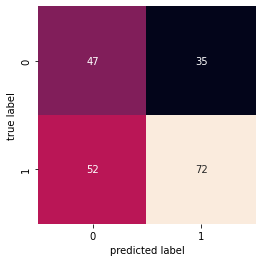

In [ ]:
for C in [0.0000001,0.000001, 0.00001, 0.1, 0.5, 10.0]:
    # Apply logistic regression
    model = LogisticRegression(random_state=0, max_iter=500, C = C, 
    class_weight = 'balanced').fit(X1_resampled_, y1_resampled_)
    
    y_pred_test_ = model.predict(X1_val_scaled)
    
    # showing C and R square values
    print("C:", C, "score:", model.score(X1_val_scaled, y1_val))

# Choose C = 0.1 as the parameter, as it has higher score.
model = LogisticRegression(random_state=0, max_iter=500, C = 0.00001, 
class_weight = 'balanced')

model.fit(X1_resampled, y1_resampled)
y_pred_test_ = model.predict(X1_test_scaled)

# Score to evaluate model performance
# print("Test set accuracy is: ", model_selected_features.score(X_test, y_test))
print("Test set F1 score is: ",  f1_score(y1_test, y_pred_test_, average='micro'))

mat = confusion_matrix(y_pred_test_, y1_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('predicted label')
plt.ylabel('true label')

precision_recall = classification_report(y1_test, y_pred_test_)
print(precision_recall)

# The F1 score after regulariztion does not change. We keep the step of 
# regularization.

Logistic Regression: after binary classification (2nd way, by grouping classes 0-1 as class 0 and classes 2-4 as class 1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test set F1 score is:  0.6262135922330098
              precision    recall  f1-score   support

         0.0       0.14      0.48      0.22        23
         1.0       0.91      0.64      0.75       183

    accuracy                           0.63       206
   macro avg       0.53      0.56      0.49       206
weighted avg       0.82      0.63      0.69       206



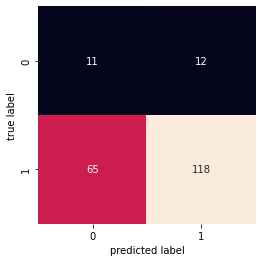

In [ ]:
## Logistic Regression: after binary classification (2nd way)
y_df = pd.DataFrame(y, columns = ['education'])
y_df['education_binary'] = np.nan

# 'Less than high school degree','High school degree' are in class 0
y_df.loc[y_df['education'] == 0, 'education_binary'] = 0 
y_df.loc[y_df['education'] == 1, 'education_binary'] = 0 

# "Some college or Associate degree",'Bachelor degree', and 'Graduate degree'
# are in class 1
y_df.loc[y_df['education'] == 2, 'education_binary'] = 1 
y_df.loc[y_df['education'] == 3, 'education_binary'] = 1 
y_df.loc[y_df['education'] == 4, 'education_binary'] = 1 
y_df = y_df[['education_binary']]

# Standardization
X2_train, X2_test, y2_train, y2_test = train_test_split(df[['use_oxford_comma', 
'heard_of_comma', 'care_for_comma', 'use_data_plural', 'considered_data_plural',
'care_data_plural', 'care_grammar']], y_df, test_size=0.2,
random_state=0)

# have the train data split into train and cross validation data
X2_train_2, X2_val, y2_train_2, y2_val = train_test_split(X2_train, 
                            y2_train, test_size=0.2, random_state=0)

ss = StandardScaler()
X2_train_2_scaled = pd.DataFrame(ss.fit_transform(X2_train_2), 
columns=X2_train_2.columns)
X2_val_scaled = pd.DataFrame(ss.transform(X2_val), columns=X2_val.columns)

# Scale full training set (since we do CV training later)
X2_train_scaled = pd.DataFrame(ss.fit_transform(X2_train), columns=X2_train.columns)
X2_test_scaled = pd.DataFrame(ss.transform(X2_test), columns=X2_test.columns)

# Oversampling
# https://imbalanced-learn.org/stable/over_sampling.html#a-practical-guide
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0, sampling_strategy='not majority')
X2_resampled, y2_resampled = ros.fit_resample(X2_train_scaled, y2_train)
X2_resampled_,y2_resampled_ = ros.fit_resample(X2_train_2_scaled, y2_train_2)
use_resampled = True

model = LogisticRegression(random_state=0, max_iter=500,
class_weight = 'balanced')
model.fit(X2_resampled, y2_resampled)
y_pred_test_ = model.predict(X2_test_scaled)

# Score to evaluate model performance
# print("Test set accuracy is: ", model_selected_features.score(X_test, y_test))
print("Test set F1 score is: ",  f1_score(y2_test, y_pred_test_, average='micro'))

mat = confusion_matrix(y_pred_test_, y2_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('predicted label')
plt.ylabel('true label')

precision_recall = classification_report(y2_test, y_pred_test_)
print(precision_recall)

Logistic Regression: after regularization (2nd way binary classification)

C: 1e-07 score: 0.5792682926829268


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

C: 1e-06 score: 0.5792682926829268
C: 1e-05 score: 0.5792682926829268
C: 0.1 score: 0.5853658536585366
C: 0.5 score: 0.5853658536585366
C: 10.0 score: 0.5853658536585366
Test set F1 score is:  0.6310679611650486
              precision    recall  f1-score   support

         0.0       0.15      0.48      0.22        23
         1.0       0.91      0.65      0.76       183

    accuracy                           0.63       206
   macro avg       0.53      0.56      0.49       206
weighted avg       0.82      0.63      0.70       206



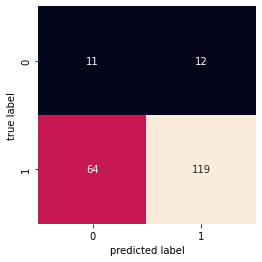

In [ ]:
for C in [0.0000001,0.000001, 0.00001, 0.1, 0.5, 10.0]:
    # Apply logistic regression
    model = LogisticRegression(random_state=0, max_iter=500, C = C, 
    class_weight = 'balanced').fit(X2_resampled_, y2_resampled_)
    
    y_pred_test_ = model.predict(X2_val_scaled)
    
    # showing C and R square values
    print("C:", C, "score:", model.score(X2_val_scaled, y2_val))

# Choose C = 0.1 as the parameter, as it has higher score.
model = LogisticRegression(random_state=0, max_iter=500, C = 0.1, 
class_weight = 'balanced')

model.fit(X2_resampled, y2_resampled)
y_pred_test_ = model.predict(X2_test_scaled)

# Score to evaluate model performance
# print("Test set accuracy is: ", model_selected_features.score(X_test, y_test))
print("Test set F1 score is: ",  f1_score(y2_test, y_pred_test_, average='micro'))

mat = confusion_matrix(y_pred_test_, y2_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('predicted label')
plt.ylabel('true label')

precision_recall = classification_report(y2_test, y_pred_test_)
print(precision_recall)

# The F1 score after regulariztion does not change. We keep the step of 
# regularization.

#### kNN

kNN (Baseline) w/o optimization

Test set F1 score is:  0.3106796116504854
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.14      0.16      0.15        19
           2       0.29      0.31      0.30        59
           3       0.35      0.31      0.33        64
           4       0.36      0.38      0.37        60

    accuracy                           0.31       206
   macro avg       0.23      0.23      0.23       206
weighted avg       0.31      0.31      0.31       206



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


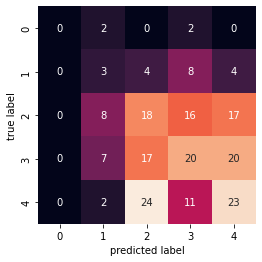

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

y_pred_test_ = knn.predict(X_test)

# Score to evaluate model performance
# print("Test set accuracy is: ",  knn.score(X_test_scaled, y_test))
print("Test set F1 score is: ",  f1_score(y_test, y_pred_test_, average='micro'))

mat = confusion_matrix(y_pred_test_, y_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('predicted label')
plt.ylabel('true label')

precision_recall = classification_report(y_test, y_pred_test_)
print(precision_recall)

kNN: after standardization, class weights, oversampling, and binary classification (1st way)

Test set F1 score is:  0.5145631067961165


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

         0.0       0.40      0.44      0.42        82
         1.0       0.60      0.56      0.58       124

    accuracy                           0.51       206
   macro avg       0.50      0.50      0.50       206
weighted avg       0.52      0.51      0.52       206



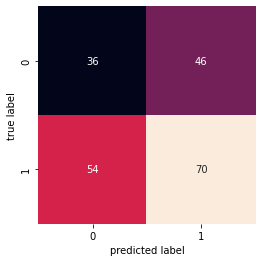

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1,weights='distance')
knn.fit(X1_resampled, y1_resampled)

y_pred_test_ = knn.predict(X1_test_scaled)

# Score to evaluate model performance
# print("Test set accuracy is: ",  knn.score(X1_test_scaled, y1_test))
print("Test set F1 score is: ",  f1_score(y1_test, y_pred_test_, average='micro'))

mat = confusion_matrix(y_pred_test_, y1_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('predicted label')
plt.ylabel('true label')

precision_recall = classification_report(y1_test, y_pred_test_)
print(precision_recall)

kNN optimize k: binary classification (1st way)

The optimal number of neighbors is 7.


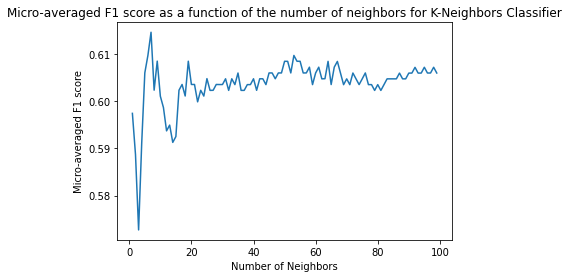

In [ ]:
from sklearn.model_selection import cross_val_score
# creating list of K for KNN
k_list = list(range(1,100))

# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation to find the optimal k-value
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k,weights='distance')
    if not use_resampled:
        scores = cross_val_score(knn, X1_train_2_scaled, np.ravel(y1_train_2), 
        cv=10, scoring='f1_micro')
    else:
        scores = cross_val_score(knn, X1_resampled_, np.ravel(y1_resampled_), 
        cv=10, scoring='f1_micro')
    cv_scores.append(scores.mean())
    
# plot the resulting F1 across number of neighbors
plt.plot(k_list, cv_scores)
plt.title("Micro-averaged F1 score as a function of the number of neighbors for K-Neighbors Classifier")
plt.xlabel("Number of Neighbors")
plt.ylabel("Micro-averaged F1 score")

# select the number of neighbors which maximizes the accuracy
best_k = k_list[cv_scores.index(max(cv_scores))]
print("The optimal number of neighbors is %d." % best_k)

Test set F1 score is:  0.558252427184466
              precision    recall  f1-score   support

         0.0       0.45      0.46      0.46        82
         1.0       0.64      0.62      0.63       124

    accuracy                           0.56       206
   macro avg       0.54      0.54      0.54       206
weighted avg       0.56      0.56      0.56       206



/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


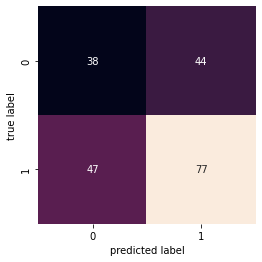

In [ ]:
# Evaluate kNN
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier(n_neighbors=7,weights='distance')
if not use_resampled:
    knn.fit(X1_train_scaled, y1_train)
else:
    knn.fit(X1_resampled, y1_resampled)

y_pred_test_ = knn.predict(X1_test_scaled)

# Score to evaluate model performance
# print("Test set accuracy is: ",  knn.score(X1_test_scaled, y1_test))
print("Test set F1 score is: ",  f1_score(y1_test, y_pred_test_, average='micro'))

mat = confusion_matrix(y_pred_test_, y1_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('predicted label')
plt.ylabel('true label')

precision_recall = classification_report(y1_test, y_pred_test_)
print(precision_recall)

kNN: after standardization, oversampling, and binary classification (2nd way)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Test set F1 score is:  0.8349514563106796
              precision    recall  f1-score   support

         0.0       0.24      0.22      0.23        23
         1.0       0.90      0.91      0.91       183

    accuracy                           0.83       206
   macro avg       0.57      0.56      0.57       206
weighted avg       0.83      0.83      0.83       206



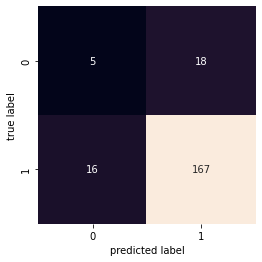

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1, weights='distance')
knn.fit(X2_resampled, y2_resampled)

y_pred_test_ = knn.predict(X2_test_scaled)

# Score to evaluate model performance
# print("Test set accuracy is: ",  knn.score(Xb_test_scaled, yb_test))
print("Test set F1 score is: ",  f1_score(y2_test, y_pred_test_, average='micro'))

mat = confusion_matrix(y_pred_test_, y2_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('predicted label')
plt.ylabel('true label')

precision_recall = classification_report(y2_test, y_pred_test_)
print(precision_recall)

kNN optimize k: binary classification (2nd way)

The optimal number of neighbors is 14.


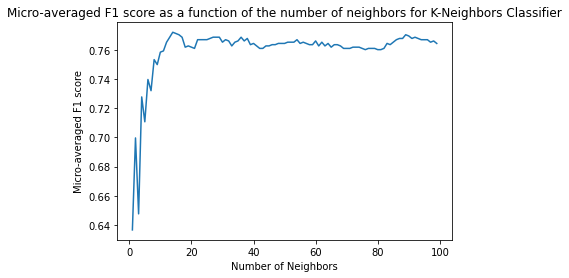

In [ ]:
# creating list of K for KNN
k_list = list(range(1,100))

# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation to find the optimal k-value
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k,weights='distance')
    if not use_resampled:
        scores = cross_val_score(knn, X2_train_2_scaled, np.ravel(y2_train_2), 
        cv=10, scoring='f1_micro')
    else:
        scores = cross_val_score(knn, X2_resampled_, np.ravel(y2_resampled_), 
        cv=10, scoring='f1_micro')
    cv_scores.append(scores.mean())
    
# plot the resulting F1 across number of neighbors
plt.plot(k_list, cv_scores)
plt.title("Micro-averaged F1 score as a function of the number of neighbors for K-Neighbors Classifier")
plt.xlabel("Number of Neighbors")
plt.ylabel("Micro-averaged F1 score")

# select the number of neighbors which maximizes the accuracy
best_k = k_list[cv_scores.index(max(cv_scores))]
print("The optimal number of neighbors is %d." % best_k)

Test set F1 score is:  0.6941747572815534
              precision    recall  f1-score   support

         0.0       0.16      0.39      0.22        23
         1.0       0.91      0.73      0.81       183

    accuracy                           0.69       206
   macro avg       0.53      0.56      0.52       206
weighted avg       0.82      0.69      0.74       206



/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


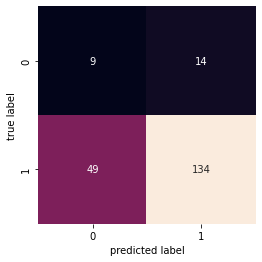

In [ ]:
# Evaluate kNN
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier(n_neighbors=14,weights='distance')
if not use_resampled:
    knn.fit(X2_train_scaled, y2_train)
else:
    knn.fit(X2_resampled, y2_resampled)

y_pred_test_ = knn.predict(X2_test_scaled)

# Score to evaluate model performance
# print("Test set accuracy is: ",  knn.score(X2_test_scaled, y2_test))
print("Test set F1 score is: ",  f1_score(y2_test, y_pred_test_, average='micro'))

mat = confusion_matrix(y_pred_test_, y2_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('predicted label')
plt.ylabel('true label')

precision_recall = classification_report(y2_test, y_pred_test_)
print(precision_recall)

#### Decision Tree

Decision Tree (Baseline) w/o optimization

Test set F1 score is:  0.3106796116504854
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.09      0.11      0.10        19
           2       0.29      0.32      0.30        59
           3       0.33      0.41      0.37        64
           4       0.47      0.28      0.35        60

    accuracy                           0.31       206
   macro avg       0.24      0.22      0.22       206
weighted avg       0.33      0.31      0.31       206



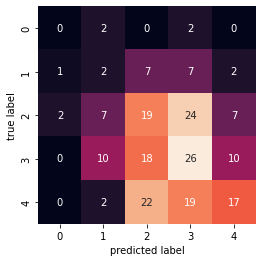

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

y_pred_test_ = dt.predict(X_test)

# Score to evaluate model performance
# print("Test set accuracy is: ",  knn.score(X_test, y_test))
print("Test set F1 score is: ",  f1_score(y_test, y_pred_test_, average='micro'))

mat = confusion_matrix(y_pred_test_, y_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('predicted label')
plt.ylabel('true label')

precision_recall = classification_report(y_test, y_pred_test_)
print(precision_recall)

Decision Tree: after standardization, class weights, oversampling, and binary classification (1st way)

Test set F1 score is:  0.587378640776699
              precision    recall  f1-score   support

         0.0       0.49      0.60      0.54        82
         1.0       0.69      0.58      0.63       124

    accuracy                           0.59       206
   macro avg       0.59      0.59      0.58       206
weighted avg       0.61      0.59      0.59       206



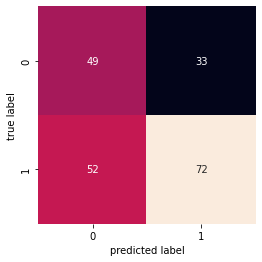

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(class_weight='balanced',random_state=0)
dt.fit(X1_resampled, y1_resampled)

y_pred_test_ = dt.predict(X1_test_scaled)

# Score to evaluate model performance
# print("Test set accuracy is: ",  dt.score(X1_test_scaled, y1_test))
print("Test set F1 score is: ",  f1_score(y1_test, y_pred_test_, average='micro'))

mat = confusion_matrix(y_pred_test_, y1_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('predicted label')
plt.ylabel('true label')

precision_recall = classification_report(y1_test, y_pred_test_)
print(precision_recall)

Decision Tree optimize max_depth: binary classification (1st way)

The optimal max depth is 11.
Optimal micro-avergaed F1 is 0.608356.


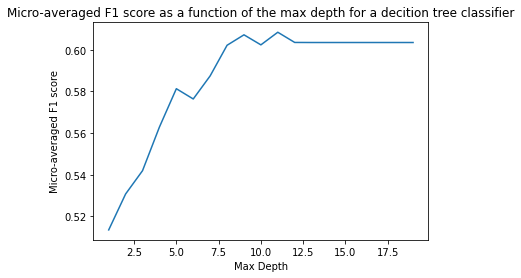

In [ ]:
from sklearn.model_selection import cross_val_score
# creating list of max depth for decision tree
depth_list = list(range(1,20))

# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation to find the optimal max depth-value
for depth in depth_list:
    dt = DecisionTreeClassifier(max_depth=depth,random_state=0,
         class_weight='balanced')
    if not use_resampled:
        scores = cross_val_score(dt, X1_train_2_scaled, np.ravel(y1_train_2), 
        cv=10, scoring='f1_micro')
    else:
        scores = cross_val_score(dt, X1_resampled_, np.ravel(y1_resampled_), 
        cv=10, scoring='f1_micro')
    cv_scores.append(scores.mean())
    
# plot the resulting F1 across number of neighbors
plt.plot(depth_list, cv_scores)
plt.title("Micro-averaged F1 score as a function of the max depth for a decition tree classifier")
plt.xlabel("Max Depth")
plt.ylabel("Micro-averaged F1 score")

# select the number of neighbors which maximizes the accuracy
best_depth = depth_list[cv_scores.index(max(cv_scores))]
print("The optimal max depth is %d." % best_depth)
print("Optimal micro-avergaed F1 is %f." % cv_scores[best_depth-1])

Test set F1 score is:  0.5728155339805825
              precision    recall  f1-score   support

         0.0       0.47      0.59      0.52        82
         1.0       0.67      0.56      0.61       124

    accuracy                           0.57       206
   macro avg       0.57      0.57      0.57       206
weighted avg       0.59      0.57      0.58       206



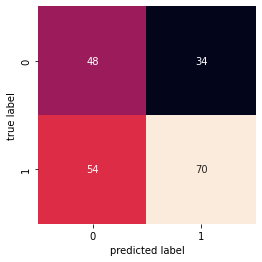

In [ ]:
# Evaluate Decision Tree
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

dt = DecisionTreeClassifier(class_weight='balanced',max_depth=11,random_state=0)
if not use_resampled:
    dt.fit(X1_train_scaled, y1_train)
else:
    dt.fit(X1_resampled, y1_resampled)

y_pred_test_ = dt.predict(X1_test_scaled)

# Score to evaluate model performance
# print("Test set accuracy is: ",  knn.score(X1_test_scaled, y1_test))
print("Test set F1 score is: ",  f1_score(y1_test, y_pred_test_, average='micro'))

mat = confusion_matrix(y_pred_test_, y1_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('predicted label')
plt.ylabel('true label')

precision_recall = classification_report(y1_test, y_pred_test_)
print(precision_recall)

Decision Tree: after standardization, class weights, oversampling, and binary classification (2nd way)

Test set F1 score is:  0.6893203883495146
              precision    recall  f1-score   support

         0.0       0.14      0.35      0.20        23
         1.0       0.90      0.73      0.81       183

    accuracy                           0.69       206
   macro avg       0.52      0.54      0.50       206
weighted avg       0.81      0.69      0.74       206



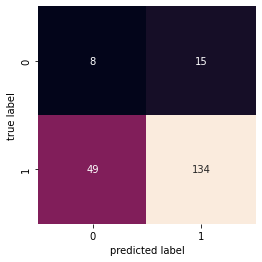

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(class_weight='balanced',random_state=0)
dt.fit(X2_resampled, y2_resampled)

y_pred_test_ = dt.predict(X2_test_scaled)

# Score to evaluate model performance
# print("Test set accuracy is: ",  dt.score(X2_test_scaled, y2_test))
print("Test set F1 score is: ",  f1_score(y2_test, y_pred_test_, average='micro'))

mat = confusion_matrix(y_pred_test_, y2_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('predicted label')
plt.ylabel('true label')

precision_recall = classification_report(y2_test, y_pred_test_)
print(precision_recall)

The optimal max depth is 11.
Optimal micro-avergaed F1 is 0.779857.


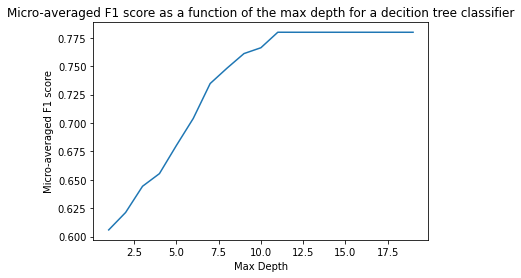

In [ ]:
from sklearn.model_selection import cross_val_score
# creating list of max depth for decision tree
depth_list = list(range(1,20))

# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation to find the optimal max depth-value
for depth in depth_list:
    dt = DecisionTreeClassifier(max_depth=depth,random_state=0,
         class_weight='balanced')
    if not use_resampled:
        scores = cross_val_score(dt, X2_train_2_scaled, np.ravel(y2_train_2), 
        cv=10, scoring='f1_micro')
    else:
        scores = cross_val_score(dt, X2_resampled_, np.ravel(y2_resampled_), 
        cv=10, scoring='f1_micro')
    cv_scores.append(scores.mean())
    
# plot the resulting F1 across number of neighbors
plt.plot(depth_list, cv_scores)
plt.title("Micro-averaged F1 score as a function of the max depth for a decition tree classifier")
plt.xlabel("Max Depth")
plt.ylabel("Micro-averaged F1 score")

# select the number of neighbors which maximizes the accuracy
best_depth = depth_list[cv_scores.index(max(cv_scores))]
print("The optimal max depth is %d." % best_depth)
print("Optimal micro-avergaed F1 is %f." % cv_scores[best_depth-1])

Test set F1 score is:  0.6941747572815534
              precision    recall  f1-score   support

         0.0       0.14      0.35      0.20        23
         1.0       0.90      0.74      0.81       183

    accuracy                           0.69       206
   macro avg       0.52      0.54      0.51       206
weighted avg       0.82      0.69      0.74       206



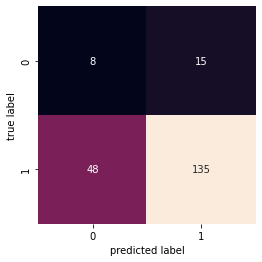

In [ ]:
# Evaluate Decision Tree
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

dt = DecisionTreeClassifier(class_weight='balanced',max_depth=11,random_state=0)
if not use_resampled:
    dt.fit(X2_train_scaled, y2_train)
else:
    dt.fit(X2_resampled, y2_resampled)

y_pred_test_ = dt.predict(X2_test_scaled)

# Score to evaluate model performance
# print("Test set accuracy is: ",  dt.score(X2_test_scaled, y2_test))
print("Test set F1 score is: ",  f1_score(y2_test, y_pred_test_, average='micro'))

mat = confusion_matrix(y_pred_test_, y2_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('predicted label')
plt.ylabel('true label')

precision_recall = classification_report(y2_test, y_pred_test_)
print(precision_recall)

#### Random Forest

Random Forest (Baseline) w/o optimization

Test set F1 score is:  0.32038834951456313
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.09      0.16      0.11        19
           2       0.32      0.31      0.31        59
           3       0.39      0.33      0.36        64
           4       0.46      0.40      0.43        60

    accuracy                           0.32       206
   macro avg       0.25      0.24      0.24       206
weighted avg       0.36      0.32      0.34       206



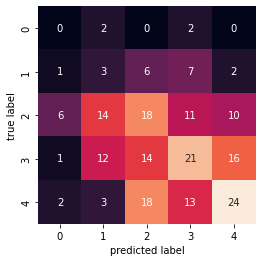

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=0)
dt.fit(X_train, y_train)

y_pred_test_ = dt.predict(X_test)

# Score to evaluate model performance
# print("Test set accuracy is: ",  knn.score(X_test, y_test))
print("Test set F1 score is: ",  f1_score(y_test, y_pred_test_, average='micro'))

mat = confusion_matrix(y_pred_test_, y_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('predicted label')
plt.ylabel('true label')

precision_recall = classification_report(y_test, y_pred_test_)
print(precision_recall)

Random Forest: after standardization, class weights, oversampling, and binary classification (1st way)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Test set F1 score is:  0.587378640776699
              precision    recall  f1-score   support

         0.0       0.48      0.52      0.50        82
         1.0       0.67      0.63      0.65       124

    accuracy                           0.59       206
   macro avg       0.57      0.58      0.58       206
weighted avg       0.59      0.59      0.59       206



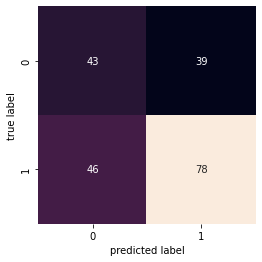

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(class_weight='balanced',random_state=0)
clf.fit(X1_resampled, y1_resampled)

y_pred_test_ = clf.predict(X1_test_scaled)

# Score to evaluate model performance
# print("Test set accuracy is: ",  clf.score(X1_test_scaled, y1_test))
print("Test set F1 score is: ",  f1_score(y1_test, y_pred_test_, average='micro'))

mat = confusion_matrix(y_pred_test_, y1_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('predicted label')
plt.ylabel('true label')

precision_recall = classification_report(y1_test, y_pred_test_)
print(precision_recall)

Random Forest optimize n_estimators: binary classification (1st way)

The optimal number of trees is 11.000000.
Optimal micro-avergaed F1 is 0.620777.


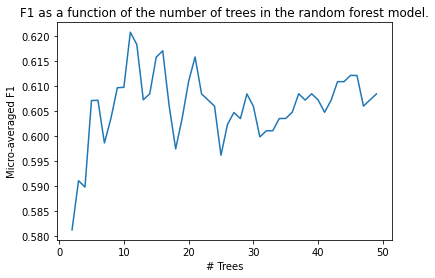

In [ ]:
from sklearn.model_selection import cross_val_score

# find the best number of trees
num_trees = [i for i in range(2,50,1)]
num_trees

# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation to find the optimal max depth-value
for trees in num_trees:
    clf = RandomForestClassifier(n_estimators=trees,random_state=0,
          class_weight='balanced')
    if not use_resampled:
        scores = cross_val_score(clf, X1_train_2_scaled, np.ravel(y1_train_2), 
        cv=10, scoring='f1_micro')
    else:
        scores = cross_val_score(clf, X1_resampled_, np.ravel(y1_resampled_), 
        cv=10, scoring='f1_micro')
    cv_scores.append(scores.mean())

# plot the resulting accuracy across regularization strength
plt.plot(num_trees, cv_scores)
plt.title("F1 as a function of the number of trees in the random forest model.")
plt.xlabel("# Trees")
plt.ylabel("Micro-averaged F1")

# select the number of neighbors which maximizes the accuracy
best_num_trees = num_trees[cv_scores.index(max(cv_scores))]
print("The optimal number of trees is %f." % best_num_trees)
print("Optimal micro-avergaed F1 is %f." % cv_scores[cv_scores.index(max(cv_scores))])

Test set F1 score is:  0.5922330097087378
              precision    recall  f1-score   support

         0.0       0.49      0.54      0.51        82
         1.0       0.67      0.63      0.65       124

    accuracy                           0.59       206
   macro avg       0.58      0.58      0.58       206
weighted avg       0.60      0.59      0.59       206



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


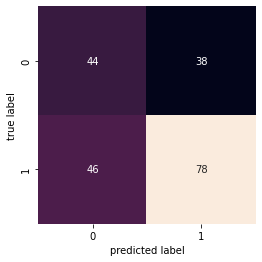

In [ ]:
# Evaluate random forest
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

clf = RandomForestClassifier(n_estimators=11, class_weight='balanced', 
      random_state=0)
if not use_resampled:
    clf.fit(X1_train_scaled, y1_train)
else:
    clf.fit(X1_resampled, y1_resampled)

y_pred_test_ = clf.predict(X1_test_scaled)

# Score to evaluate model performance
# print("Test set accuracy is: ",  clf.score(X1_test_scaled, y1_test))
print("Test set F1 score is: ",  f1_score(y1_test, y_pred_test_, average='micro'))

mat = confusion_matrix(y_pred_test_, y1_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('predicted label')
plt.ylabel('true label')

precision_recall = classification_report(y1_test, y_pred_test_)
print(precision_recall)

Random Forest: after standardization, class weights, oversampling, and binary classification (2nd way)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Test set F1 score is:  0.7135922330097088
              precision    recall  f1-score   support

         0.0       0.15      0.35      0.21        23
         1.0       0.90      0.76      0.82       183

    accuracy                           0.71       206
   macro avg       0.53      0.55      0.52       206
weighted avg       0.82      0.71      0.76       206



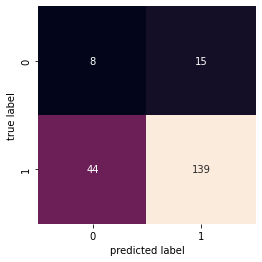

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(class_weight='balanced',random_state=0)
clf.fit(X2_resampled, y2_resampled)

y_pred_test_ = clf.predict(X2_test_scaled)

# Score to evaluate model performance
# print("Test set accuracy is: ",  clf.score(X2_test_scaled, y2_test))
print("Test set F1 score is: ",  f1_score(y2_test, y_pred_test_, average='micro'))

mat = confusion_matrix(y_pred_test_, y2_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('predicted label')
plt.ylabel('true label')

precision_recall = classification_report(y2_test, y_pred_test_)
print(precision_recall)

Random Forest optimize n_estimators: binary classification (2nd way)

The optimal number of trees is 22.000000.
Optimal micro-avergaed F1 is 0.784137.


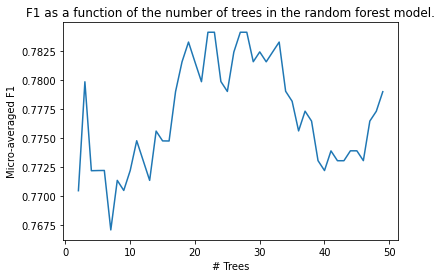

In [ ]:
from sklearn.model_selection import cross_val_score

# find the best number of trees
num_trees = [i for i in range(2,50,1)]
num_trees

# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation to find the optimal max depth-value
for trees in num_trees:
    clf = RandomForestClassifier(n_estimators=trees,random_state=0,
          class_weight='balanced')
    if not use_resampled:
        scores = cross_val_score(clf, X2_train_2_scaled, np.ravel(y2_train_2), 
        cv=10, scoring='f1_micro')
    else:
        scores = cross_val_score(clf, X2_resampled_, np.ravel(y2_resampled_), 
        cv=10, scoring='f1_micro')
    cv_scores.append(scores.mean())

# plot the resulting accuracy across regularization strength
plt.plot(num_trees, cv_scores)
plt.title("F1 as a function of the number of trees in the random forest model.")
plt.xlabel("# Trees")
plt.ylabel("Micro-averaged F1")

# select the number of neighbors which maximizes the accuracy
best_num_trees = num_trees[cv_scores.index(max(cv_scores))]
print("The optimal number of trees is %f." % best_num_trees)
print("Optimal micro-avergaed F1 is %f." % cv_scores[cv_scores.index(max(cv_scores))])

Test set F1 score is:  0.7184466019417476
              precision    recall  f1-score   support

         0.0       0.17      0.39      0.24        23
         1.0       0.91      0.76      0.83       183

    accuracy                           0.72       206
   macro avg       0.54      0.58      0.53       206
weighted avg       0.83      0.72      0.76       206



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


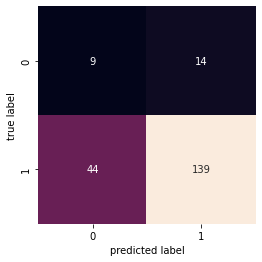

In [ ]:
# Evaluate random forest
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

clf = RandomForestClassifier(n_estimators=22, class_weight='balanced', 
      random_state=0)
if not use_resampled:
    clf.fit(X2_train_scaled, y2_train)
else:
    clf.fit(X2_resampled, y2_resampled)

y_pred_test_ = clf.predict(X2_test_scaled)

# Score to evaluate model performance
# print("Test set accuracy is: ",  clf.score(X2_test_scaled, y2_test))
print("Test set F1 score is: ",  f1_score(y2_test, y_pred_test_, average='micro'))

mat = confusion_matrix(y_pred_test_, y2_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('predicted label')
plt.ylabel('true label')

precision_recall = classification_report(y2_test, y_pred_test_)
print(precision_recall)

#### Naive Bayes

Multinomial Naive Bayes (Baseline) w/o optimization

Test set F1 score is:  0.33980582524271846
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        19
           2       0.38      0.14      0.20        59
           3       0.28      0.66      0.40        64
           4       0.54      0.33      0.41        60

    accuracy                           0.34       206
   macro avg       0.24      0.23      0.20       206
weighted avg       0.35      0.34      0.30       206



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


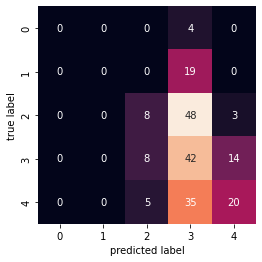

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)

y_pred_test_ = nb.predict(X_test)

# Score to evaluate model performance
# print("Test set accuracy is: ",  nb.score(X_test, y_test))
print("Test set F1 score is: ",  f1_score(y_test, y_pred_test_, average='micro'))

mat = confusion_matrix(y_pred_test_, y_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('predicted label')
plt.ylabel('true label')

precision_recall = classification_report(y_test, y_pred_test_)
print(precision_recall)

Naive Bayes: after oversampling, and binary classification (1st way)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test set F1 score is:  0.616504854368932
              precision    recall  f1-score   support

         0.0       0.52      0.62      0.56        82
         1.0       0.71      0.61      0.66       124

    accuracy                           0.62       206
   macro avg       0.61      0.62      0.61       206
weighted avg       0.63      0.62      0.62       206



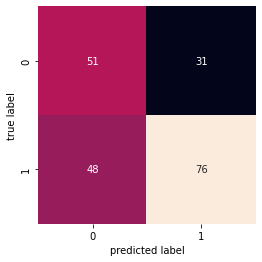

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import RandomOverSampler

# Oversampling
# https://imbalanced-learn.org/stable/over_sampling.html#a-practical-guide
ros = RandomOverSampler(random_state=0, sampling_strategy='not majority')
X1nb_resampled, y1nb_resampled = ros.fit_resample(X1_train, y1_train)
X1nb_resampled_,y1nb_resampled_ = ros.fit_resample(X1_train_2, y1_train_2)
use_resampled = True

nb = MultinomialNB()
nb.fit(X1nb_resampled, y1nb_resampled)

y_pred_test_ = nb.predict(X1_test)

# Score to evaluate model performance
# print("Test set accuracy is: ",  nb.score(X1_test, y1_test))
print("Test set F1 score is: ",  f1_score(y1_test, y_pred_test_, average='micro'))

mat = confusion_matrix(y_pred_test_, y1_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('predicted label')
plt.ylabel('true label')

precision_recall = classification_report(y1_test, y_pred_test_)
print(precision_recall)

Naive Bayes optimize *alpha*: binary classification (1st way)

The optimal a-val is 2.500000.
Optimal micro-avergaed F1 is 0.562752.


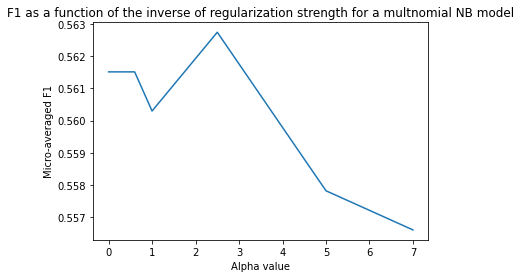

In [ ]:
from sklearn.model_selection import cross_val_score

# find the best alpha
a_vals = [0.000001, 0.0001, 0.0075, 0.02, 0.05, 0.1, 0.5, 0.6, 1.0, 2.5, 5, 7]

# creating list of cv scores
cv_scores = []

# find the best regularization hyperparameter
for a in a_vals:
    nb = MultinomialNB(alpha=a)
    if not use_resampled:
        scores = cross_val_score(nb, X1_train_2, np.ravel(y1_train_2), cv=10, 
        scoring='f1_micro')
    else:
        scores = cross_val_score(nb, X1nb_resampled_, np.ravel(y1nb_resampled_),
        cv=10, scoring='f1_micro')
    cv_scores.append(scores.mean())

# plot the resulting accuracy across regularization strength
plt.plot(a_vals, cv_scores)
plt.title("F1 as a function of the inverse of regularization strength for a multnomial NB model")
plt.xlabel("Alpha value")
plt.ylabel("Micro-averaged F1")

# select the number of neighbors which maximizes the accuracy
best_a = a_vals[cv_scores.index(max(cv_scores))]
print("The optimal a-val is %3f." % best_a)
print("Optimal micro-avergaed F1 is %f." % cv_scores[cv_scores.index(max(cv_scores))])

Test set F1 score is:  0.616504854368932
              precision    recall  f1-score   support

         0.0       0.52      0.62      0.56        82
         1.0       0.71      0.61      0.66       124

    accuracy                           0.62       206
   macro avg       0.61      0.62      0.61       206
weighted avg       0.63      0.62      0.62       206



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


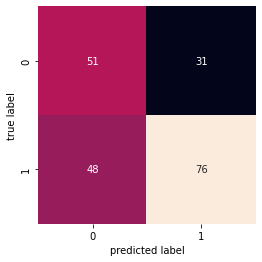

In [ ]:
# Evaluate MultinomialNB
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

nb = MultinomialNB(alpha=2.5)
if not use_resampled:
    nb.fit(X1_train, y1_train)
else:
    nb.fit(X1nb_resampled, y1nb_resampled)

y_pred_test_ = nb.predict(X1_test)

# Score to evaluate model performance
# print("Test set accuracy is: ",  nb.score(X1_test, y1_test))
print("Test set F1 score is: ",  f1_score(y1_test, y_pred_test_, average='micro'))

mat = confusion_matrix(y_pred_test_, y1_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('predicted label')
plt.ylabel('true label')

precision_recall = classification_report(y1_test, y_pred_test_)
print(precision_recall)

Naive Bayes: after standardization, class weights, oversampling, and binary classification (2nd way)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test set F1 score is:  0.6213592233009708
              precision    recall  f1-score   support

         0.0       0.10      0.30      0.15        23
         1.0       0.88      0.66      0.76       183

    accuracy                           0.62       206
   macro avg       0.49      0.48      0.45       206
weighted avg       0.80      0.62      0.69       206



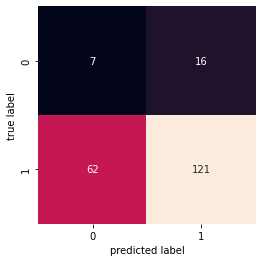

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import RandomOverSampler

# Oversampling
# https://imbalanced-learn.org/stable/over_sampling.html#a-practical-guide
ros = RandomOverSampler(random_state=0, sampling_strategy='not majority')
X2nb_resampled, y2nb_resampled = ros.fit_resample(X2_train, y2_train)
X2nb_resampled_,y2nb_resampled_ = ros.fit_resample(X2_train_2, y2_train_2)
use_resampled = True

nb = MultinomialNB()
nb.fit(X2nb_resampled, y2nb_resampled)

y_pred_test_ = nb.predict(X2_test)

# Score to evaluate model performance
# print("Test set accuracy is: ",  nb.score(X2_test, y2_test))
print("Test set F1 score is: ",  f1_score(y2_test, y_pred_test_, average='micro'))

mat = confusion_matrix(y_pred_test_, y2_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('predicted label')
plt.ylabel('true label')

precision_recall = classification_report(y2_test, y_pred_test_)
print(precision_recall)

Naive Bayes optimize *alpha*: binary classification (2nd way)

The optimal a-val is 0.000001.
Optimal micro-avergaed F1 is 0.594720.


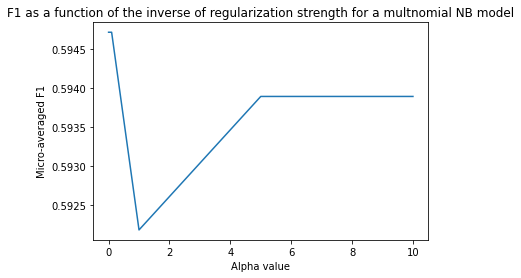

In [ ]:
from sklearn.model_selection import cross_val_score

# find the best alpha
a_vals = [0.000001, 0.0001, 0.001, 0.01, 0.1, 1.0, 5.0, 10.0]

# creating list of cv scores
cv_scores = []

# find the best regularization hyperparameter
for a in a_vals:
    nb = MultinomialNB(alpha=a)
    if not use_resampled:
        scores = cross_val_score(nb, X2_train_2, np.ravel(y2_train_2), cv=10, 
        scoring='f1_micro')
    else:
        scores = cross_val_score(nb, X2nb_resampled_, np.ravel(y2nb_resampled_),
        cv=10, scoring='f1_micro')
    cv_scores.append(scores.mean())

# plot the resulting accuracy across regularization strength
plt.plot(a_vals, cv_scores)
plt.title("F1 as a function of the inverse of regularization strength for a multnomial NB model")
plt.xlabel("Alpha value")
plt.ylabel("Micro-averaged F1")

# select the number of neighbors which maximizes the accuracy
best_a = a_vals[cv_scores.index(max(cv_scores))]
print("The optimal a-val is %3f." % best_a)
print("Optimal micro-avergaed F1 is %f." % cv_scores[cv_scores.index(max(cv_scores))])

Test set F1 score is:  0.6310679611650486
              precision    recall  f1-score   support

         0.0       0.10      0.30      0.16        23
         1.0       0.88      0.67      0.76       183

    accuracy                           0.63       206
   macro avg       0.49      0.49      0.46       206
weighted avg       0.80      0.63      0.70       206



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


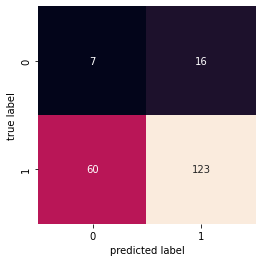

In [ ]:
# Evaluate MultinomialNB
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

nb = MultinomialNB(alpha=0.000001)
if not use_resampled:
    nb.fit(X2_train, y2_train)
else:
    nb.fit(X2nb_resampled, y2nb_resampled)

y_pred_test_ = nb.predict(X2_test)

# Score to evaluate model performance
# print("Test set accuracy is: ",  nb.score(X2_test, y2_test))
print("Test set F1 score is: ",  f1_score(y2_test, y_pred_test_, average='micro'))

mat = confusion_matrix(y_pred_test_, y2_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('predicted label')
plt.ylabel('true label')

precision_recall = classification_report(y2_test, y_pred_test_)
print(precision_recall)

#### SVC (Support Vector Classification)

SVC (Baseline) w/o optimization (default kernel = 'rbf')

Test set F1 score is:  0.3446601941747573
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        19
           2       0.35      0.29      0.31        59
           3       0.30      0.56      0.39        64
           4       0.49      0.30      0.37        60

    accuracy                           0.34       206
   macro avg       0.23      0.23      0.22       206
weighted avg       0.33      0.34      0.32       206



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


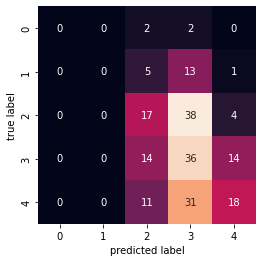

In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf',random_state=0)
svc.fit(X_train, y_train)

y_pred_test_ = svc.predict(X_test)

# Score to evaluate model performance
# print("Test set accuracy is: ",  svc.score(X_test, y_test))
print("Test set F1 score is: ",  f1_score(y_test, y_pred_test_, average='micro'))

mat = confusion_matrix(y_pred_test_, y_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('predicted label')
plt.ylabel('true label')

precision_recall = classification_report(y_test, y_pred_test_)
print(precision_recall)

SVC: after standardization, class weights, oversampling, and binary classification (1st way); (default kernel = 'rbf')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test set F1 score is:  0.5922330097087378
              precision    recall  f1-score   support

         0.0       0.49      0.57      0.53        82
         1.0       0.68      0.60      0.64       124

    accuracy                           0.59       206
   macro avg       0.59      0.59      0.58       206
weighted avg       0.61      0.59      0.60       206



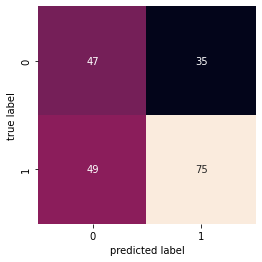

In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf', random_state=0,class_weight='balanced')
svc.fit(X1_resampled, y1_resampled)

y_pred_test_ = svc.predict(X1_test_scaled)

# Score to evaluate model performance
# print("Test set accuracy is: ",  svc.score(X1_test_scaled, y1_test))
print("Test set F1 score is: ",  f1_score(y1_test, y_pred_test_, average='micro'))

mat = confusion_matrix(y_pred_test_, y1_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('predicted label')
plt.ylabel('true label')

precision_recall = classification_report(y1_test, y_pred_test_)
print(precision_recall)

SVC rbf kernel optimize C

The optimal c-val is 5.000000.
Optimal micro-avergaed F1 is 0.601024.


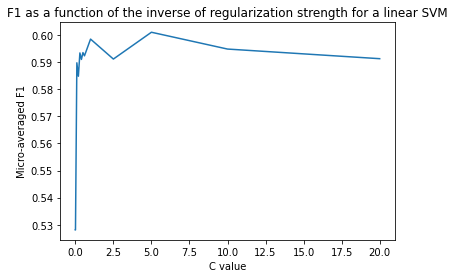

In [ ]:
from sklearn.model_selection import cross_val_score

# find the optimal C
c_vals = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 1.0, 2.5, 5, 10, 20]

# creating list of cv scores
cv_scores = []

# find the best regularization hyperparameter
for c in c_vals:
    svc = SVC(kernel='rbf', C=c,random_state=0,class_weight='balanced')
    if not use_resampled:
        scores = cross_val_score(svc, X1_train_2_scaled, np.ravel(y_train_2), 
        cv=10, scoring='f1_micro')
    else:
        scores = cross_val_score(svc, X1_resampled_, np.ravel(y1_resampled_), 
        cv=10, scoring='f1_micro')
    cv_scores.append(scores.mean())

# plot the resulting accuracy across regularization strength
plt.plot(c_vals, cv_scores)
plt.title("F1 as a function of the inverse of regularization strength for a linear SVM")
plt.xlabel("C value")
plt.ylabel("Micro-averaged F1")

# select the number of neighbors which maximizes the accuracy
best_c = c_vals[cv_scores.index(max(cv_scores))]
print("The optimal c-val is %f." % best_c)
print("Optimal micro-avergaed F1 is %f." % cv_scores[cv_scores.index(max(cv_scores))])

Test set F1 score is:  0.616504854368932
              precision    recall  f1-score   support

         0.0       0.52      0.50      0.51        82
         1.0       0.68      0.69      0.69       124

    accuracy                           0.62       206
   macro avg       0.60      0.60      0.60       206
weighted avg       0.61      0.62      0.62       206



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


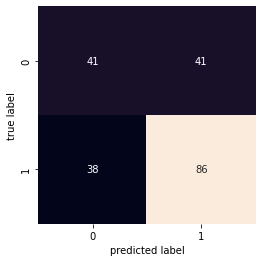

In [ ]:
# Evaluate SVC with rbf kernel

svc = SVC(kernel='rbf', C=5,random_state=0,class_weight='balanced')
if not use_resampled:
    svc.fit(X1_train_scaled, y1_train)
else:
    svc.fit(X1_resampled, y1_resampled)

y_pred_test_ = svc.predict(X1_test_scaled)

# Score to evaluate model performance
# print("Test set accuracy is: ",  svc.score(X1_test_scaled, y1_test))
print("Test set F1 score is: ",  f1_score(y1_test, y_pred_test_, average='micro'))

mat = confusion_matrix(y_pred_test_, y1_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('predicted label')
plt.ylabel('true label')

precision_recall = classification_report(y1_test, y_pred_test_)
print(precision_recall)

SVC linear kernel binary classification (1st way)

Test set F1 score is:  0.5970873786407767
              precision    recall  f1-score   support

         0.0       0.50      0.61      0.55        82
         1.0       0.70      0.59      0.64       124

    accuracy                           0.60       206
   macro avg       0.60      0.60      0.59       206
weighted avg       0.62      0.60      0.60       206



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


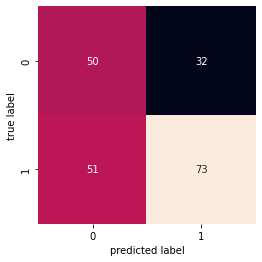

In [ ]:
from sklearn.svm import SVC

svc = SVC(random_state=0,class_weight='balanced',kernel='linear')
svc.fit(X1_resampled, y1_resampled)

y_pred_test_ = svc.predict(X1_test_scaled)

# Score to evaluate model performance
# print("Test set accuracy is: ",  svc.score(X1_test_scaled, y1_test))
print("Test set F1 score is: ",  f1_score(y1_test, y_pred_test_, average='micro'))

mat = confusion_matrix(y_pred_test_, y1_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('predicted label')
plt.ylabel('true label')

precision_recall = classification_report(y1_test, y_pred_test_)
print(precision_recall)

SVC linear kernel optimize C

The optimal c-val is 0.010000.
Optimal micro-avergaed F1 is 0.544294.


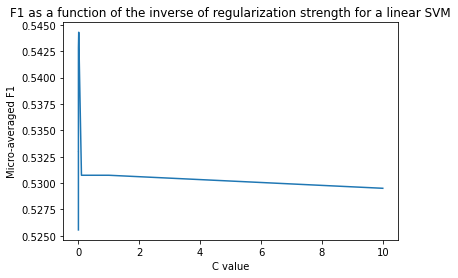

In [ ]:
from sklearn.model_selection import cross_val_score

# find the optimal C
c_vals = [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10]

# creating list of cv scores
cv_scores = []

# find the best regularization hyperparameter
for c in c_vals:
    svc = SVC(kernel='linear', C=c,random_state=0,class_weight='balanced')
    if not use_resampled:
        scores = cross_val_score(svc, X1_train_2_scaled, np.ravel(y_train_2), 
        cv=10, scoring='f1_micro')
    else:
        scores = cross_val_score(svc, X1_resampled_, np.ravel(y1_resampled_), 
        cv=10, scoring='f1_micro')
    cv_scores.append(scores.mean())

# plot the resulting accuracy across regularization strength
plt.plot(c_vals, cv_scores)
plt.title("F1 as a function of the inverse of regularization strength for a linear SVM")
plt.xlabel("C value")
plt.ylabel("Micro-averaged F1")

# select the number of neighbors which maximizes the accuracy
best_c = c_vals[cv_scores.index(max(cv_scores))]
print("The optimal c-val is %f." % best_c)
print("Optimal micro-avergaed F1 is %f." % cv_scores[cv_scores.index(max(cv_scores))])

Test set F1 score is:  0.5970873786407767
              precision    recall  f1-score   support

         0.0       0.50      0.61      0.55        82
         1.0       0.70      0.59      0.64       124

    accuracy                           0.60       206
   macro avg       0.60      0.60      0.59       206
weighted avg       0.62      0.60      0.60       206



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


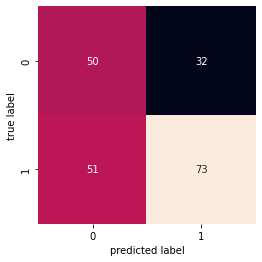

In [ ]:
# Evaluate SVC with linear kernel

svc = SVC(kernel='linear', C=0.01,random_state=0,class_weight='balanced')
if not use_resampled:
    svc.fit(X1_train_scaled, y1_train)
else:
    svc.fit(X1_resampled, y1_resampled)

y_pred_test_ = svc.predict(X1_test_scaled)

# Score to evaluate model performance
# print("Test set accuracy is: ",  svc.score(X1_test_scaled, y1_test))
print("Test set F1 score is: ",  f1_score(y1_test, y_pred_test_, average='micro'))

mat = confusion_matrix(y_pred_test_, y1_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('predicted label')
plt.ylabel('true label')

precision_recall = classification_report(y1_test, y_pred_test_)
print(precision_recall)

SVC polynomial kernel binary classification (1st way)

Test set F1 score is:  0.6067961165048543
              precision    recall  f1-score   support

         0.0       0.51      0.44      0.47        82
         1.0       0.66      0.72      0.69       124

    accuracy                           0.61       206
   macro avg       0.58      0.58      0.58       206
weighted avg       0.60      0.61      0.60       206



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


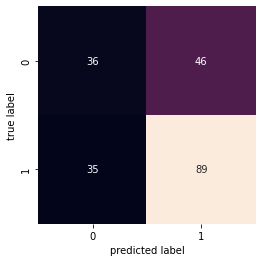

In [ ]:
from sklearn.svm import SVC

svc = SVC(random_state=0,class_weight='balanced',kernel='poly')
svc.fit(X1_resampled, y1_resampled)

y_pred_test_ = svc.predict(X1_test_scaled)

# Score to evaluate model performance
# print("Test set accuracy is: ",  svc.score(X1_test_scaled, y1_test))
print("Test set F1 score is: ",  f1_score(y1_test, y_pred_test_, average='micro'))

mat = confusion_matrix(y_pred_test_, y1_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('predicted label')
plt.ylabel('true label')

precision_recall = classification_report(y1_test, y_pred_test_)
print(precision_recall)

SVC polynomial kernel optimize C

The optimal c-val is 1.000000.
Optimal micro-avergaed F1 is 0.587398.


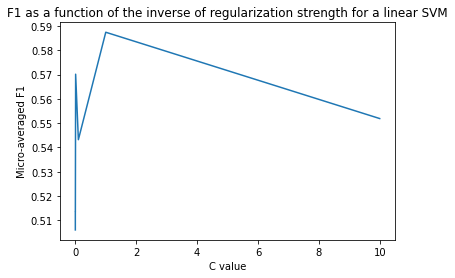

In [ ]:
from sklearn.model_selection import cross_val_score

# find the optimal C
c_vals = [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10]

# creating list of cv scores
cv_scores = []

# find the best regularization hyperparameter
for c in c_vals:
    svc = SVC(kernel='poly', C=c,random_state=0,class_weight='balanced')
    if not use_resampled:
        scores = cross_val_score(svc, X1_train_2_scaled, np.ravel(y_train_2), 
        cv=10, scoring='f1_micro')
    else:
        scores = cross_val_score(svc, X1_resampled_, np.ravel(y1_resampled_), 
        cv=10, scoring='f1_micro')
    cv_scores.append(scores.mean())

# plot the resulting accuracy across regularization strength
plt.plot(c_vals, cv_scores)
plt.title("F1 as a function of the inverse of regularization strength for a linear SVM")
plt.xlabel("C value")
plt.ylabel("Micro-averaged F1")

# select the number of neighbors which maximizes the accuracy
best_c = c_vals[cv_scores.index(max(cv_scores))]
print("The optimal c-val is %f." % best_c)
print("Optimal micro-avergaed F1 is %f." % cv_scores[cv_scores.index(max(cv_scores))])

Test set F1 score is:  0.6067961165048543
              precision    recall  f1-score   support

         0.0       0.51      0.44      0.47        82
         1.0       0.66      0.72      0.69       124

    accuracy                           0.61       206
   macro avg       0.58      0.58      0.58       206
weighted avg       0.60      0.61      0.60       206



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


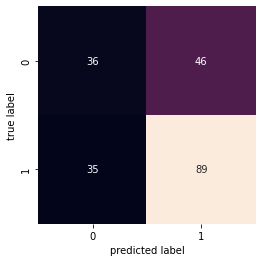

In [ ]:
# Evaluate SVC with polynomial kernel

svc = SVC(kernel='poly', C=1,random_state=0,class_weight='balanced')
if not use_resampled:
    svc.fit(X1_train_scaled, y1_train)
else:
    svc.fit(X1_resampled, y1_resampled)

y_pred_test_ = svc.predict(X1_test_scaled)

# Score to evaluate model performance
# print("Test set accuracy is: ",  svc.score(X1_test_scaled, y1_test))
print("Test set F1 score is: ",  f1_score(y1_test, y_pred_test_, average='micro'))

mat = confusion_matrix(y_pred_test_, y1_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('predicted label')
plt.ylabel('true label')

precision_recall = classification_report(y1_test, y_pred_test_)
print(precision_recall)